# Introduction to dataset

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_name = '/content/drive/MyDrive/Colab Notebooks/MLApp Project/dataset_trabajos_ai.csv'
df = pd.read_csv(path_name)
df.sample(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2990,2990,Research Scientist,$200K-$250K(Employer est.),"Working at the intersection of hardware, softw...",4.3,Carbon3D\n4.3,"Redwood City, CA","Redwood City, CA",201 to 500 employees,2013,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,-1
6218,6218,Business Analyst,$55K-$78K (Glassdoor est.),"United States - New Jersey, United States - Ne...",3.6,UBS\n3.6,"Weehawken, NJ","Zurich, Switzerland",10000+ employees,1862,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),"Deutsche Bank, Credit Suisse, Morgan Stanley",-1
516,516,Data Analyst,$132K-$208K (Glassdoor est.),We're committed to bringing passion and custom...,4.0,Swinerton Builders\n4.0,"Los Angeles, CA","San Francisco, CA",1001 to 5000 employees,1888,Company - Private,Construction,"Construction, Repair & Maintenance",$2 to $5 billion (USD),"DPR Construction, Webcor",-1
3643,3643,Federal - Data Scientist,$96K-$155K (Glassdoor est.),Organization: Accenture Federal Services\n\nLo...,4.2,Solekai Systems Corp\n4.2,"Irving, TX","San Diego, CA",1 to 50 employees,2002,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD),-1,-1
4213,4213,"Data & Reporting Analyst, GNHCC",$27K-$52K (Glassdoor est.),VNA Health Group is a premiere Medicare/Medica...,3.3,VNA Health Group\n3.3,"Essex Fells, NJ","Holmdel, NJ",1001 to 5000 employees,1912,Nonprofit Organization,Social Assistance,Non-Profit,$50 to $100 million (USD),-1,-1


In [3]:
if 'Unnamed: 0' in df.columns:
  df = df.drop(columns=['Unnamed: 0'])

summaries = []

for col in df.columns:
    summary = df[col].describe()
    summary_dict = summary.to_dict()
    summary_dict["Data type"] = df[col].dtype
    summary_dict["Column"] = col
    summaries.append(summary_dict)

summary_df = pd.DataFrame(summaries).set_index("Column")

summary_df


,count,unique,top,freq,Data type,mean,std,min,25%,50%,75%,max
Column,,,,,,,,,,,,
Job Title,12782.0,5823.0,Data Analyst,806.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary Estimate,12782.0,447.0,$60K-$109K (Glassdoor est.),92.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Description,12782.0,10475.0,Organization: Accenture Federal Services\n\nLo...,15.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,12782.0,NaN,NaN,NaN,float64,3.300915,1.552518,-1.0,3.2,3.7,4.1,5.0
Company Name,12781.0,4921.0,"Staffigo Technical Services, LLC\n5.0",264.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,12782.0,404.0,"New York, NY",1047.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headquarters,12782.0,990.0,"New York, NY",930.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,12782.0,9.0,10000+ employees,2772.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,12782.0,NaN,NaN,NaN,int64,1469.945392,864.211702,-1.0,-1.0,1981.0,2002.0,2020.0


In [4]:
list_ofvariables = df.columns.tolist()

df_aux = pd.DataFrame(columns=['Variable', 'Value_Counts'])

for i, var in enumerate(list_ofvariables):

    df_aux.loc[i,'Variable'] = var
    df_aux.loc[i,'Value_Counts'] = str(df[var].value_counts(dropna = False).to_dict())

df_aux

,Variable,Value_Counts
0,Job Title,"{'Data Analyst': 806, 'Data Engineer': 729, 'B..."
1,Salary Estimate,"{'$60K-$109K (Glassdoor est.)': 92, '$43K-$84K..."
2,Job Description,"{""Organization: Accenture Federal Services\n\n..."
3,Rating,"{-1.0: 1271, 3.9: 907, 3.7: 891, 3.6: 861, 3.8..."
4,Company Name,"{'Staffigo Technical Services, LLC\n5.0': 264,..."
5,Location,"{'New York, NY': 1047, 'Austin, TX': 956, 'Chi..."
6,Headquarters,"{'New York, NY': 930, '-1': 756, 'San Diego, C..."
7,Size,"{'10000+ employees': 2772, '51 to 200 employee..."
8,Founded,"{-1: 3274, 2008: 390, 1999: 349, 2002: 339, 20..."
9,Type of ownership,"{'Company - Private': 6858, 'Company - Public'..."


From this quick summaries we can appreciate that:

- -1s & nans are missing values.
- The raw dataset does only contain 1 numeric variable: `rating`. Let's see if some transformations can be applied to obtain more (for example from Salary - Estimate)
- `Job Description` column contains strings with the full job description. Here is where we will apply the NLP tasks.

By a quick inspect of the rating column, it could be identified that it is related to the company, not to the job. Hence, it can not be used as the dependent variable in a regression analysis. (As we were considering from the beggining)

In [ ]:
df.groupby('Company Name')['rating'].nunique()

### Separation of lower and upper bound for Salary Estimate

In [5]:
# create new columns initialized as NaN
df['Low_salary_estimate (K)'] = np.nan
df['High_salary_estimate (K)'] = np.nan

# process salary estimates
for i, salary in df['Salary Estimate'].items():

    if pd.isna(salary):
        continue

    # Note that in the datasets there are found some salaries in hour, then lets compute the yearly salary.
    if 'Per Hour' in salary:
        # extract hourly range
        match = pd.Series(salary).str.extract(r'\$(\d+)-\$(\d+)')
        if match.isnull().values.any():
            continue
        low = int(match[0][0]) * 40 * 52
        high = int(match[1][0]) * 40 * 52
        df.loc[i, 'Low_salary_estimate (K)'] = low / 1000  # in K
        df.loc[i, 'High_salary_estimate (K)'] = high / 1000  # in K

    elif 'K' in salary:
        # extract annual range
        match = pd.Series(salary).str.extract(r'\$(\d+)K\-\$(\d+)K')
        if match.isnull().values.any():
            continue
        low = int(match[0][0])
        high = int(match[1][0])
        df.loc[i, 'Low_salary_estimate (K)'] = low
        df.loc[i, 'High_salary_estimate (K)'] = high

# check result
print(df[['Salary Estimate', 'Low_salary_estimate (K)', 'High_salary_estimate (K)']].head())

df[['Salary Estimate', 'Low_salary_estimate (K)', 'High_salary_estimate (K)']].isna().sum()

                Salary Estimate  Low_salary_estimate (K)  \
0  $111K-$181K (Glassdoor est.)                    111.0   
1  $111K-$181K (Glassdoor est.)                    111.0   
2  $111K-$181K (Glassdoor est.)                    111.0   
3  $111K-$181K (Glassdoor est.)                    111.0   
4  $111K-$181K (Glassdoor est.)                    111.0   

   High_salary_estimate (K)  
0                     181.0  
1                     181.0  
2                     181.0  
3                     181.0  
4                     181.0  


,0
Salary Estimate,0
Low_salary_estimate (K),1
High_salary_estimate (K),1


In [6]:
# as the na's produced are low enough (1), let's drop those values
df = df.dropna(subset=['Low_salary_estimate (K)', 'High_salary_estimate (K)'])
# drop the initial column
df = df.drop(columns = ['Salary Estimate'])

In [7]:
df["Company Name"] = df["Company Name"].str.replace(r"\n.*", "", regex=True)

# Let's separate into train and test sets

## Missing values analysis

/usr/local/lib/python3.11/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


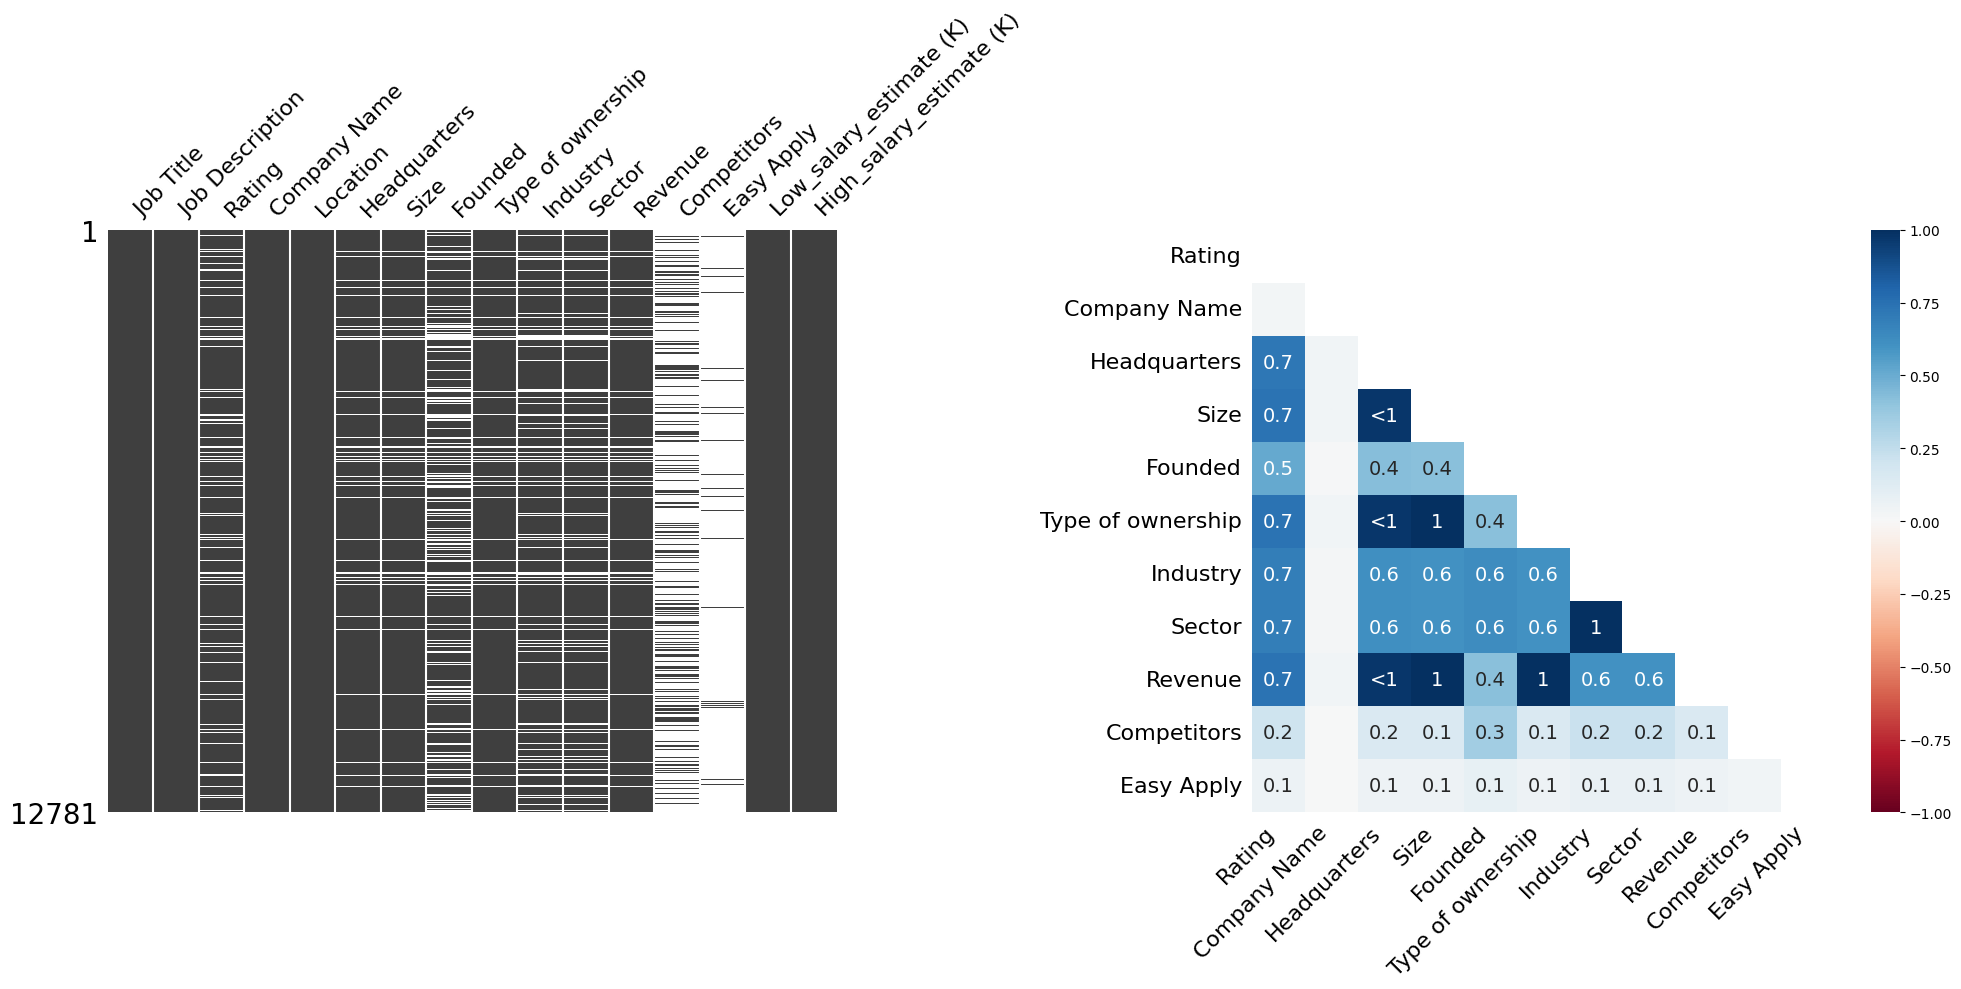

In [8]:
df = df.replace('-1', np.nan)
df=df.replace(-1,np.nan)
df=df.replace('-1.0',np.nan)

fig, axs = plt.subplots(1,2, figsize = (20,10))
msno.matrix(df, ax = axs[0])
msno.heatmap(df, ax =  axs[1])

plt.tight_layout()
plt.show()

In [9]:
# Calculate the proportion of NaN values in each column
nan_proportions = df.isna().sum()*100 / len(df)
nan_proportions

,0
Job Title,0.000000
Job Description,0.000000
Rating,9.944449
Company Name,0.007824
Location,0.000000
Headquarters,5.915030
Size,5.641186
Founded,25.616149
Type of ownership,5.641186
Industry,14.091229


- Since our analysis is not going to use the column `Easy Apply` and it is not going to provide significant information, we will drop it.

- Foundation and Competitors present a lot of NaN presents a lot of Nans, they will be removed too because it will probably cause more noise if we impute those missing values.

> The triangle formed with some of the information company, presents several couples of columns with a really high correlation of NAs missing, so probably removing this rows is a good choice.

In [10]:
cols_to_remove = ['Easy Apply', 'Competitors', 'Founded']
# remove columns
df = df.drop(columns=cols_to_remove)
# Drop the rest of rows with NAs

In [11]:
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

# Dataset where we drop Nans

In [12]:
df_train_wo_na = df_train.dropna()
df_test_wo_na = df_test.dropna()

In [13]:
print('INITIAL SHAPE', df_train.shape)
print('Dataframe without NAs SHAPE', df_train_wo_na.shape)

INITIAL SHAPE (10225, 13)
Dataframe without NAs SHAPE (8626, 13)


By doing this, we drop around 2000 rows of the original dataset, that makes the 83% of the rows are kept for the analysis.

**The elimination of 17% of rows is above the 5-10% recommended in the state of the art, so this approach might not be the most liable.**

# Dataset where NAs changed for Unknown class (categorical) & KNN Imputer for 'Rating'

### Change Nans for Unknown in some columns

In [14]:
df_unknowns = df_train.copy()

df_unknowns[['Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue']] = df_unknowns[['Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue']].fillna('Unknown')

# the ones that are still NAs are a really low percentage, so we'll drop them (except of NAs in Rating column)
df_unknowns = df_unknowns.dropna(subset = list(set(df_unknowns.columns) - set(['Rating'])))

### KNNImputer en Rating

In [15]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

def knn_impute_rating(df, rating_col="Rating", categorical_cols=None, numerical_cols = None, n_neighbors=5):
    """
    imputes missing values in the rating column using KNN imputer based on categorical columns.
    """
    # select columns for imputation
    cols_for_imputation = [rating_col] + categorical_cols + numerical_cols
    df_knn = df[cols_for_imputation].copy()

    # encode categorical columns
    encoder = OrdinalEncoder()
    df_knn[categorical_cols] = encoder.fit_transform(df_knn[categorical_cols])

    # apply knn imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=cols_for_imputation, index=df_knn.index)

    # update the rating column in the original dataframe
    df[rating_col] = df_knn_imputed[rating_col]

    return df

categorical_cols = ["Job Title", "Company Name", "Location", "Industry"]
numerical_cols = ["Low_salary_estimate (K)", "High_salary_estimate (K)"]

df_unknowns = knn_impute_rating(df_unknowns, rating_col="Rating", categorical_cols=categorical_cols, numerical_cols = numerical_cols, n_neighbors=5)

In [16]:
df_unknowns.isna().sum()

,0
Job Title,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Type of ownership,0
Industry,0
Sector,0


### Repeat the same with Test set

In [17]:
df_unknowns_test = df_test.copy()

df_unknowns_test[['Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue']] = df_unknowns_test[['Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue']].fillna('Unknown')

# the ones that are still NAs are a really low percentage, so we'll drop them (except of NAs in Rating column)
df_unknowns_test = df_unknowns_test.dropna(subset = list(set(df_unknowns_test.columns) - set(['Rating'])))

In [18]:
categorical_cols = ["Job Title", "Company Name", "Location", "Industry"]
numerical_cols = ["Low_salary_estimate (K)", "High_salary_estimate (K)"]

df_unknowns_test = knn_impute_rating(df_unknowns_test, rating_col="Rating", categorical_cols=categorical_cols, numerical_cols = numerical_cols, n_neighbors=5)
df_unknowns_test.isna().sum()

,0
Job Title,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Type of ownership,0
Industry,0
Sector,0


# Dataset with imputation by GroupBy and KNN Imputer for Rating

#### NaNs Imputation using GroupBy (mode) for Categorical Values and KNN imputer for Rating



In [19]:
df_imputed = df_train.copy()
pd.set_option('future.no_silent_downcasting', True)

# imputing by company name (no change expected)
for col in ['Headquarters', "Revenue", "Size", "Industry", "Sector", "Type of ownership"]:
    df_imputed.loc[:, col] = df_imputed.groupby("Company Name")[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))

# imputing by headquarters location, size, and revenue
for col in ["Industry", "Sector"]:
    df_imputed.loc[:, col] = df_imputed.groupby(['Headquarters', 'Size', 'Revenue'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))
    df_imputed.loc[:, col] = df_imputed.groupby(['Headquarters', 'Size'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))
    df_imputed.loc[:, col] = df_imputed.groupby(['Headquarters'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))

# imputing by job title and salary estimate
for col in ['Headquarters', "Revenue", "Size", "Industry", "Sector", "Type of ownership"]:
    df_imputed.loc[:, col] = df_imputed.groupby(['Job Title', 'Low_salary_estimate (K)', 'High_salary_estimate (K)'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))
    df_imputed.loc[:, col] = df_imputed.groupby(['Job Title'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))
    df_imputed.loc[:, col] = df_imputed.groupby(['Low_salary_estimate (K)', 'High_salary_estimate (K)'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))

# show remaining missing values
print('missing values per column (after imputations):\n', df_imputed.isna().sum())

nan_proportions = df_imputed.isna().sum() * 100 / len(df_imputed)

# remove rows with missing values in any column except rating
df_imputed = df_imputed.dropna(subset=list(set(df_imputed.columns) - set(['Rating'])))

print("\nremaining missing values per column (after dropping rows with missing values in other columns):\n", df_imputed.isna().sum())


missing values per column (after imputations):
 Job Title                      0
Job Description                0
Rating                      1021
Company Name                   1
Location                       0
Headquarters                   0
Size                           0
Type of ownership              0
Industry                       0
Sector                         0
Revenue                        0
Low_salary_estimate (K)        0
High_salary_estimate (K)       0
dtype: int64

remaining missing values per column (after dropping rows with missing values in other columns):
 Job Title                      0
Job Description                0
Rating                      1020
Company Name                   0
Location                       0
Headquarters                   0
Size                           0
Type of ownership              0
Industry                       0
Sector                         0
Revenue                        0
Low_salary_estimate (K)        0
High_salary_esti

Now we input the column ratings using some of the other columns

In [20]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ["Job Title", "Company Name", "Location", "Industry"]
numerical_cols = ["Low_salary_estimate (K)", "High_salary_estimate (K)"]

df_imputed = knn_impute_rating(df_imputed, rating_col="Rating", categorical_cols=categorical_cols, numerical_cols = numerical_cols, n_neighbors=5)

#### Repeat the same with test set

In [21]:
df_imputed_test = df_test.copy()
pd.set_option('future.no_silent_downcasting', True)

# imputing by company name (no change expected)
for col in ['Headquarters', "Revenue", "Size", "Industry", "Sector", "Type of ownership"]:
    df_imputed_test.loc[:, col] = df_imputed_test.groupby("Company Name")[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))

# imputing by headquarters location, size, and revenue
for col in ["Industry", "Sector"]:
    df_imputed_test.loc[:, col] = df_imputed_test.groupby(['Headquarters', 'Size', 'Revenue'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))
    df_imputed_test.loc[:, col] = df_imputed_test.groupby(['Headquarters', 'Size'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))
    df_imputed_test.loc[:, col] = df_imputed_test.groupby(['Headquarters'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))

# imputing by job title and salary estimate
for col in ['Headquarters', "Revenue", "Size", "Industry", "Sector", "Type of ownership"]:
    df_imputed_test.loc[:, col] = df_imputed_test.groupby(['Job Title', 'Low_salary_estimate (K)', 'High_salary_estimate (K)'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))
    df_imputed_test.loc[:, col] = df_imputed_test.groupby(['Job Title'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))
    df_imputed_test.loc[:, col] = df_imputed_test.groupby(['Low_salary_estimate (K)', 'High_salary_estimate (K)'])[col].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size > 0 else x))

# show remaining missing values
print('missing values per column (after imputations):\n', df_imputed_test.isna().sum())

nan_proportions = df_imputed_test.isna().sum() * 100 / len(df_imputed_test)

# remove rows with missing values in any column except rating
df_imputed_test = df_imputed_test.dropna(subset=list(set(df_imputed_test.columns) - set(['Rating'])))

print("\nremaining missing values per column (after dropping rows with missing values in other columns):\n", df_imputed_test.isna().sum())


missing values per column (after imputations):
 Job Title                     0
Job Description               0
Rating                      250
Company Name                  0
Location                      0
Headquarters                  0
Size                          0
Type of ownership             0
Industry                      0
Sector                        0
Revenue                       0
Low_salary_estimate (K)       0
High_salary_estimate (K)      0
dtype: int64

remaining missing values per column (after dropping rows with missing values in other columns):
 Job Title                     0
Job Description               0
Rating                      250
Company Name                  0
Location                      0
Headquarters                  0
Size                          0
Type of ownership             0
Industry                      0
Sector                        0
Revenue                       0
Low_salary_estimate (K)       0
High_salary_estimate (K)      0
dtype: in

In [22]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ["Job Title", "Company Name", "Location", "Industry"]
numerical_cols = ["Low_salary_estimate (K)", "High_salary_estimate (K)"]

df_imputed_test = knn_impute_rating(df_imputed_test, rating_col="Rating", categorical_cols=categorical_cols, numerical_cols = numerical_cols, n_neighbors=5)

# (train + test) datasets in the 3 preprocessing forms are exported to the origin shared folder

In [23]:
print("df_train_wo_na:", df_train_wo_na.shape)
print("df_test_wo_na:", df_test_wo_na.shape)
print("df_unknowns:", df_unknowns.shape)
print("df_unknowns_test:", df_unknowns_test.shape)
print("df_imputed:", df_imputed.shape)
print("df_imputed_test:", df_imputed_test.shape)

df_train_wo_na: (8626, 13)
df_test_wo_na: (2174, 13)
df_unknowns: (10224, 13)
df_unknowns_test: (2556, 13)
df_imputed: (10224, 13)
df_imputed_test: (2556, 13)


In [24]:
print("df_train_wo_na:", df_train_wo_na.isna().sum().sum())
print("df_test_wo_na:", df_test_wo_na.isna().sum().sum())
print("df_unknowns:", df_unknowns.isna().sum().sum())
print("df_unknowns_test:", df_unknowns_test.isna().sum().sum())
print("df_imputed:", df_imputed.isna().sum().sum())
print("df_imputed_test:", df_imputed_test.isna().sum().sum())

df_train_wo_na: 0
df_test_wo_na: 0
df_unknowns: 0
df_unknowns_test: 0
df_imputed: 0
df_imputed_test: 0


In [25]:
df_train_wo_na.to_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_train_wo_na.csv')
df_test_wo_na.to_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_test_wo_na.csv')
df_unknowns.to_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_train_na_as_unknowns.csv')
df_unknowns_test.to_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_test_na_as_unknowns.csv')
df_imputed.to_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_train_imputed.csv')
df_imputed_test.to_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_test_imputed.csv')


# NLP task

In [27]:
import pandas as pd

In [28]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_train_na_as_unknowns.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_test_na_as_unknowns.csv')

# Task 1: Text Preprocessing & Vectorization
### Step 1: Preprocessing Spacy

In [41]:
# pip install spacy_langdetect
# !pip install contractions
!python -m spacy download xx_sent_ud_sm
!python -m spacy download en_core_web_md


  Using cached https://github.com/explosion/spacy-models/releases/download/xx_sent_ud_sm-3.8.0/xx_sent_ud_sm-3.8.0-py3-none-any.whl (4.3 MB)
✔ Download and installation successful
You can now load the package via spacy.load('xx_sent_ud_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 49.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import re
import contractions
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import pandas as pd
from tqdm import tqdm

# Use standard tqdm (not notebook version)
tqdm.pandas()

nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Load English NLP model
nlp = spacy.load('en_core_web_md')
nlp.disable_pipe('parser')
nlp.disable_pipe('ner')

# Add custom stopwords
custom_stopwords = set(['relevant', 'simple', 'base'])
for word in custom_stopwords:
    nlp.Defaults.stop_words.add(word)
    nlp.vocab[word].is_stop = True

valid_POS = set(['VERB', 'NOUN', 'ADJ', 'PROPN'])

# ------------------------
# Clean and preprocess function (without language detection!)
# ------------------------

def clean_text(text, use_stemmer=False):

    # Remove HTML
    text = BeautifulSoup(text, 'lxml').get_text()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Fix contractions (isn't -> is not)
    text = contractions.fix(text)

    return text

def process_docs(docs, use_stemmer=False):
    processed = []

    for doc in docs:
        tokens = []
        for token in doc:
            if token.is_alpha and token.pos_ in valid_POS and not token.is_stop:
                lemma = token.lemma_.lower()

                # Optional stemming
                if use_stemmer:
                    lemma = stemmer.stem(lemma)

                tokens.append(lemma)

        processed.append(' '.join(tokens))

    return processed

# ------------------------
# Processing df_train and df_test in batch (FAST)
# ------------------------

# Clean texts first
df_train["clean_text"] = df_train["Job Description"].map(clean_text)

# Use spaCy pipe to process in batch
texts = df_train["clean_text"].tolist()

processed_texts = []
for doc in tqdm(nlp.pipe(texts, batch_size=32), total=len(texts)):
    tokens = [token.lemma_.lower() for token in doc
              if token.is_alpha and token.pos_ in valid_POS and not token.is_stop]
    processed_texts.append(' '.join(tokens))

df_train["processed_text"] = processed_texts

# Repeat same for df_test
df_test["clean_text"] = df_test["Job Description"].map(clean_text)

texts_test = df_test["clean_text"].tolist()

processed_texts_test = []
for doc in tqdm(nlp.pipe(texts_test, batch_size=32), total=len(texts_test)):
    tokens = [token.lemma_.lower() for token in doc
              if token.is_alpha and token.pos_ in valid_POS and not token.is_stop]
    processed_texts_test.append(' '.join(tokens))

df_test["processed_text"] = processed_texts_test

print(df_train.head())
print(df_test.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Iker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Iker\cuarto_carrera\proyectos_cuarto\.venv\lib\site-packages\spacy\util.py:894: UserWarning: [W095] Model 'en_core_web_md' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (4.0.0.dev3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
C:\Users\Iker\AppData\Local\Temp\ipykernel_29068\1760800418.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()
  3%|▎         | 325/10224 [00:55<38:36,  4.27it/s]  

In [58]:
pd.set_option('display.max_colwidth', 100)

# Now this will print full text
print(df_train["clean_text"])

0        The Business Analyst will coordinate project specific deliverables to ensure successful implemen...
1        I am Brad, my wife's name is Sarah, and since 1999 we have been serving Austin as the best littl...
2        Status: Available\nPosted On: 6/25/2020\nJob Location: Houston, TX\nSalary\nJob Type: Full Time\...
3        TriNet is a leading provider of comprehensive human resources solutions for small to midsize bus...
4        RESPONSIBILITIES:\n\nKforce's client in Madison, WI is looking to bring on an experienced Busine...
                                                        ...                                                 
10219    Job Title: Big Data EngineerDepartment: 470-R&D IoT EngineeringReports To: Prasanna MadabushiDir...
10220    Posted: Jun 29, 2020\nWeekly Hours: 40\nRole Number:\n200159997\nWe are seeking a Data Analyst w...
10221    Medikeeper provides SaaS-based health/wellness solutions for corporate wellness programs and hea...
10222    Job Descri

In [59]:
print(df_train['processed_text'])

0        business analyst coordinate project specific deliverable ensure successful implementation propri...
1        brad wife sarah serve austin good little plumbing hvac company texas hire high skilled reliable ...
2        status available post job location houston tx salary job type time education bachelor degree com...
3        trinet lead provider comprehensive human resource solution small midsize business smb enhance bu...
4        responsibility kforce client madison wi look bring experienced business analyst join grow team c...
                                                        ...                                                 
10219    job title big data engineerdepartment iot engineeringreports prasanna madabushidirect report apo...
10220    post jun weekly hours role number seek data analyst aim turn huge amount datum generate applicat...
10221    medikeeper provide saas base health wellness solution corporate wellness program health plan hel...
10222    job descri

In [52]:
df_train.to_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_train_processed.csv')
df_test.to_csv('/content/drive/MyDrive/Colab Notebooks/MLApp Project/datasets_para_usar/df_test_processed.csv')

# Step 2: Text vectorization.
- Classical BoW or TF-IDF representation.
- Word2vec/Glove based representation or Doc2Vec vectorization.
- Extraction of themes and vector representation of the documents
using the LDA algorithm.

In [19]:
import pandas as pd
df_train = pd.read_csv('C:/Users/Iker/cuarto_carrera/proyectos_cuarto/ApplicationsML/Project/df_train_processed.csv')
df_test = pd.read_csv('C:/Users/Iker/cuarto_carrera/proyectos_cuarto/ApplicationsML/Project/df_test_processed.csv')

In [20]:
###

#BoW

###

# from sklearn.feature_extraction.text import CountVectorizer

# # Build vectorizer with min_df and max_df thresholds
# vectorizer = CountVectorizer(min_df=3, max_df=0.8)

# # Fit the vectorizer on the processed_text
# X = vectorizer.fit_transform(df_train["processed_text"])

# # Get the filtered vocabulary
# filtered_vocab = vectorizer.get_feature_names_out()

# print("Filtered vocab")
# print(filtered_vocab)

# # If you want back the processed texts filtered:
# filtered_texts = []
# for row in X:
#     tokens = [filtered_vocab[idx] for idx in row.nonzero()[1]]
#     filtered_texts.append(' '.join(tokens))

# df_train["processed_text_filtered"] = filtered_texts

# ### SAME FOR TEST

# # Build vectorizer with min_df and max_df thresholds
# vectorizer_test = CountVectorizer(min_df=3, max_df=0.8)

# # Fit the vectorizer_test on the processed_text
# X_test = vectorizer_test.fit_transform(df_test["processed_text"])

# # Get the filtered vocabulary
# filtered_vocab_test = vectorizer_test.get_feature_names_out()

# print("\n---\nFiltered vocab in test")
# print(filtered_vocab_test)

# # If you want back the processed texts filtered:
# filtered_texts_test = []
# for row in X_test:
#     tokens_test = [filtered_vocab[idx] for idx in row.nonzero()[1]]
#     filtered_texts_test.append(' '.join(tokens_test))

# df_test["processed_text_filtered"] = filtered_texts_test

# print(df_train["processed_text_filtered"])

# #####

# original_text = df_train["processed_text"].iloc[1]
# filtered_text = df_train["processed_text_filtered"].iloc[1]

# # Split into sets of words
# original_words = set(original_text.split())
# filtered_words = set(filtered_text.split())

# # Get removed words
# removed_words = original_words - filtered_words

# # Show results
# print("Original words:", original_words)
# print("Filtered words:", filtered_words)
# print("Removed words:", removed_words)

# ###
# word_to_check = "toilet"

# if word_to_check in filtered_vocab:
#     print(f"'{word_to_check}' appear less than in 80% of the documents or less than in 3 -- ACCEPTED")
# else:
#     print(f"'{word_to_check}' appear a lot or really few times -- REJECTED")

# ####
# word = "toilet"

# doc_freq = sum(word in doc.split() for doc in df_train["processed_text"])
# print(f"The word '{word}' appears in {doc_freq*100/len(df_train)}% documents.")
# print(f"The word '{word}' appears in {doc_freq} documents.")


# TF-IDF

TF-IDF solves the problem of BoW by penalizing words that appear in many documents.
It assigns each word a weight based on Term Frequency (abreviation TF) and Inverse Document Frequency (abreviation IDF), that implies how often a word appears in a document and how rare it is that word across the documents respectively.

| Parameter | Explanation                                                                                                                                              | Why use it?                                          |
| --------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------- |
| `min_df`  | Minimum number of documents a word must appear in to be included. For example, `min_df=3` only words that appear in at least 3 documents.              | Remove very rare words that could be typos or noise  |
| `max_df`  | Maximum proportion of documents a word can appear in to be included. For example, `max_df=0.9` remove words that appear in more than 90% of documents. | Remove very common words that add little information |



In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.8)

# Fit the vectorizer on the training data and transform it into vectors
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df_train["processed_text"])

#(IMPORTANT: on the test set use transform, not fit_transform)
tfidf_matrix_test = tfidf_vectorizer.transform(df_test["processed_text"])

print("TF-IDF Matrix Shape (Train):", tfidf_matrix_train.shape)
print("TF-IDF Matrix Shape (Test):", tfidf_matrix_test.shape)

# to get the vocab
filtered_vocab = tfidf_vectorizer.get_feature_names_out()
print("Sample words in vocab:", filtered_vocab[:20])

TF-IDF Matrix Shape (Train): (10224, 14552)
TF-IDF Matrix Shape (Test): (2556, 14552)
Sample words in vocab: ['aa' 'aaa' 'aab' 'aamco' 'aap' 'aar' 'aaron' 'aas' 'aav' 'ab' 'abacus'
 'abandonment' 'abap' 'abatement' 'abbot' 'abbott' 'abbvie' 'abc'
 'abcmouse' 'abcs']


Construction of filtered column just in case it is needed in the future. (This takes a lot of time)

In [22]:
filtered_vocab_set = set(tfidf_vectorizer.get_feature_names_out())

def filter_doc(doc):
    return ' '.join([word for word in doc.split() if word in filtered_vocab_set])

df_train["processed_text_filtered"] = df_train["processed_text"].apply(filter_doc)
df_test["processed_text_filtered"] = df_test["processed_text"].apply(filter_doc)

Let's see the TF-IDF values in the first job posting

In [23]:
first_doc_vector = tfidf_matrix_train[0]
df_first_doc = pd.DataFrame(first_doc_vector.T.todense(), index=filtered_vocab, columns=["TF-IDF"])
df_first_doc = df_first_doc[df_first_doc["TF-IDF"] > 0]
print(df_first_doc.sort_values("TF-IDF", ascending=False))

                  TF-IDF
proprietary     0.498763
deliverable     0.371660
coordinate      0.331542
specific        0.321650
successful      0.310677
implementation  0.260590
learn           0.247360
ensure          0.217104
software        0.209020
analyst         0.184785
project         0.172101
business        0.139728


In [24]:
original_text = df_train["processed_text"].iloc[1]
filtered_text = df_train["processed_text_filtered"].iloc[1]

# Split into sets of words
original_words = set(original_text.split())
filtered_words = set(filtered_text.split())

# Get removed words
removed_words = original_words - filtered_words

# Show results
print("Original words:", original_words)
print("Filtered words:", filtered_words)
print("Removed words:", removed_words)

print("\n----\n")

###
word_to_check = "toilet"

if word_to_check in filtered_vocab:
    print(f"'{word_to_check}' appear less than in 80% of the documents or less than in 3 -- ACCEPTED")
else:
    print(f"'{word_to_check}' appear a lot or really few times -- REJECTED")

print("\n----\n")
####
word = "toilet"

doc_freq = sum(word in doc.split() for doc in df_train["processed_text"])
print(f"The word '{word}' appears in {doc_freq*100/len(df_train)}% documents.")
print(f"The word '{word}' appears in {doc_freq} documents.")

Original words: {'orient', 'toilet', 'humor', 'year', 'wait', 'life', 'offer', 'hear', 'ability', 'feel', 'work', 'item', 'fun', 'job', 'good', 'commission', 'look', 'care', 'instagram', 'stability', 'ensure', 'proficient', 'timely', 'learn', 'candidate', 'flexible', 'reviewing', 'perform', 'monday', 'ongoing', 'way', 'reliable', 'medical', 'take', 'meet', 'desire', 'submit', 'audit', 'time', 'people', 'detail', 'employee', 'deadline', 'customer', 'mean', 'hour', 'apply', 'thank', 'skilled', 'serve', 'benefit', 'community', 'courteous', 'global', 'quickbooks', 'prefer', 'company', 'motivated', 'deduction', 'high', 'check', 'available', 'contribute', 'hire', 'great', 'pace', 'folk', 'sunday', 'upbeat', 'schedule', 'necessary', 'development', 'click', 'wage', 'insurance', 'professional', 'local', 'career', 'ideal', 'hope', 'opportunity', 'self', 'ms', 'little', 'business', 'team', 'focus', 'matching', 'sarah', 'demand', 'sale', 'payroll', 'basis', 'able', 'get', 'capacity', 'experience',

## Understanding TF-IDF vectors

Let's see in a quick plot how can we turn the TF-IDF vectors in a 2D plot by a PCA reduction

C:\Users\Iker\AppData\Local\Temp\ipykernel_17420\3849202221.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_clusters)


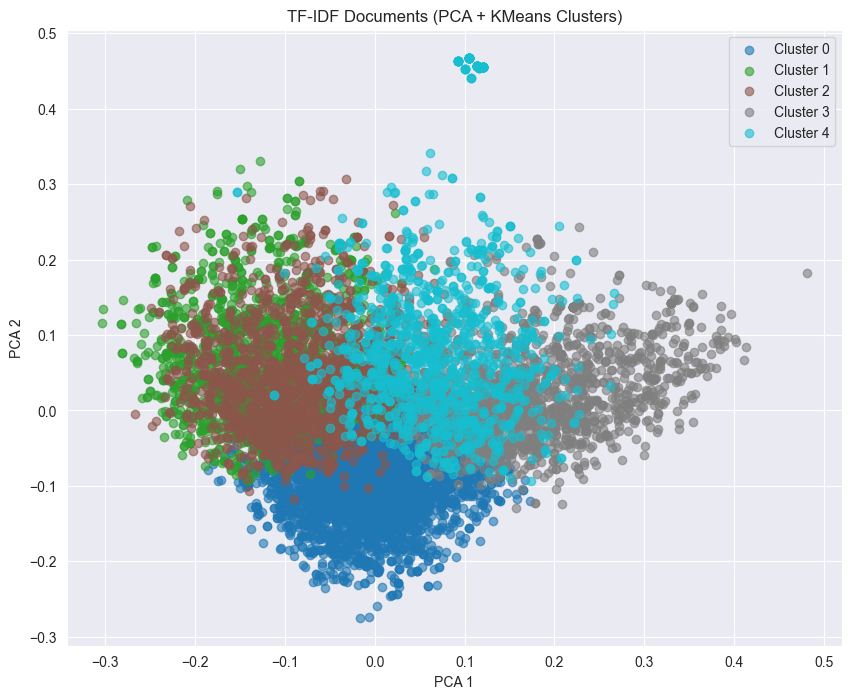

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# first we reduce TF-IDF vectors to 2D using PCA
pca = PCA(n_components=2, random_state=42)
tfidf_2d = pca.fit_transform(tfidf_matrix_train.toarray())

# then w do kmeans for clustering docs
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix_train)

# plot
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap("tab10", n_clusters)

for cluster_num in range(n_clusters):
    idx = np.where(clusters == cluster_num)
    plt.scatter(tfidf_2d[idx, 0], tfidf_2d[idx, 1],
                label=f"Cluster {cluster_num}",
                alpha=0.6,
                color=colors(cluster_num))

plt.title("TF-IDF Documents (PCA + KMeans Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()



The PCA visualization of the TF-IDF vectors, combined with KMeans clustering, provides some insights into the structure of the dataset.

- The upper left clusters are more compact, suggesting specific and homogeneous job categories, while others are more dispersed, reflecting broader or mixed descriptions. This makes sense because the correlation between job postings in this specific task (Data Science related job Offers make sense).

- Additionally, a few outliers appear on the lower left part of the plot, which could represent **niche or highly specialized** job postings.

In [26]:
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create dataframe for easy access
df_tfidf_array = pd.DataFrame(tfidf_matrix_train.toarray(), columns=feature_names)
df_tfidf_array["cluster"] = clusters

# Get top words for each cluster
for cluster_num in range(n_clusters):
    print(f"\nTop words for Cluster {cluster_num}:")
    cluster_docs = df_tfidf_array[df_tfidf_array["cluster"] == cluster_num]
    mean_tfidf = cluster_docs.mean().sort_values(ascending=False)
    print(mean_tfidf.head(10))


Top words for Cluster 0:
business      0.029662
support       0.029092
system        0.028049
job           0.027519
team          0.026281
include       0.026068
require       0.025995
management    0.025826
skill         0.025738
year          0.024163
dtype: float64

Top words for Cluster 1:
cluster       1.000000
data          0.109561
engineer      0.058482
cloud         0.053507
pipeline      0.045350
spark         0.044924
build         0.042485
big           0.042200
technology    0.042046
sql           0.041318
dtype: float64

Top words for Cluster 2:
cluster     2.000000
data        0.061662
team        0.056745
machine     0.053280
business    0.053062
learning    0.050650
product     0.044752
model       0.044350
science     0.043957
analytic    0.041216
dtype: float64

Top words for Cluster 3:
cluster        3.000000
business       0.168414
requirement    0.094019
project        0.073101
process        0.067764
system         0.067736
user           0.056639
solution     

Some of the clusters really define more defined positions such as Data Engineering with words such as Cloud, Pipeline, Engineer, Spark. Others with positions more related to business/data analytics with words such as learning, team, business, analytic...

This could be a good application to relate a inputed job by the user, and associate it to each cluster, then the model will be classifying jobs in each area, recommending other similar jobs.

# FastText

(texto por si queremos meter en el report)

For document-level vectorization, we selected pretrained FastText embeddings (wiki-news-300d) as they provide subword-level representations, which are really useful in the context of job descriptions where domain-specific or rare words are common.

Previous tries of other Glove pretrained models or Word2Vec approaches weren't based on subword information as FastText do. This allows it to generate vectors for words that **are not in its vocabulary**, which is particularly useful for job descriptions that often include technical terms, rare words, or company-specific terminology.

These models provide embeddings only at the word level. To generate document-level vectors,we had to apply **average pooling** over the word vectors. Then we obtained document vectors that capture the overall semantic content of each job description.

In [27]:
# !pip install gensim

In [28]:
import gensim.downloader as api

# Load pretrained FastText word vectors (300 dimensions)
fasttext_model = api.load('fasttext-wiki-news-subwords-300')

# check vector for a word
print("vector of word developer")
print(fasttext_model["developer"])

vector of word developer
[ 6.5373e-02 -2.3051e-02  3.0360e-02  5.1829e-03 -2.9008e-02  2.8375e-02
  8.6914e-03 -8.5632e-02  4.2505e-02  1.4764e-02 -4.1580e-02  1.4197e-02
 -4.5431e-02  5.9322e-03  8.8943e-03  4.9534e-02  7.1132e-02  2.9004e-02
  3.9314e-02  5.4635e-04  1.9094e-02  6.3188e-03  1.0728e-02  4.7761e-02
 -3.5302e-02  1.1791e-03  1.3714e-02  5.3481e-02 -2.6289e-02 -6.1195e-04
 -7.2840e-02 -1.8723e-02  3.2747e-02 -1.2835e-02 -4.0336e-02  3.0224e-02
 -3.9199e-02 -6.5429e-02 -6.4305e-02 -3.7462e-02 -2.2740e-04 -6.6758e-02
 -8.0973e-02 -7.6605e-03 -7.7237e-02  5.6996e-02 -9.3662e-03  3.7743e-02
  8.6526e-04  1.5538e-02  2.1613e-03  8.0261e-03 -4.4887e-03 -2.2796e-02
  3.0091e-02  2.6972e-02  2.8227e-02 -4.6747e-02 -3.8110e-02  4.2761e-02
  4.4968e-02 -3.8143e-02  6.0944e-02  1.4459e-02  2.5612e-02  7.0809e-03
  2.1161e-02 -8.1352e-03  2.3565e-02 -1.0373e-01  4.0763e-02 -3.2602e-02
  9.0975e-02  2.2262e-02 -3.7395e-02 -1.5879e-02 -4.9254e-02  5.2283e-03
 -8.2688e-03 -1.7263e-02 -

In [29]:
# average pooling of the wordvecors
from tqdm import tqdm
def document_vector_fasttext(doc):
    vectors = [fasttext_model[word] for word in doc.split() if word in fasttext_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(300)

# inserting in the column of df_train
tqdm.pandas()
df_train["fasttext_vector"] = df_train["processed_text_filtered"].progress_apply(document_vector_fasttext) # could also be done with 'processed_text' 
df_test["fasttext_vector"] = df_test["processed_text_filtered"].progress_apply(document_vector_fasttext)


# just in case is needed afrer
X_train_fasttext = np.vstack(df_train["fasttext_vector"].values)
X_test_fasttext = np.vstack(df_test["fasttext_vector"].values)

print("FastText Document vectors shape:", X_train_fasttext.shape)
print("FastText Test shape:", X_test_fasttext.shape)

100%|██████████| 2556/2556 [00:03<00:00, 749.02it/s]

FastText Document vectors shape: (10224, 300)
FastText Test shape: (2556, 300)


Now, every document is defined by a vector/embedding of 300 elements

### Save dataset in pickle format

Let's save the dataset so it can be reused later on without reexecuting (that is computationally expensive and takes so long)

In [30]:
df_train.to_pickle("df_train_with_fasttext.pkl")
df_test.to_pickle("df_test_with_fasttext.pkl")


# Load it later
# df_train = pd.read_pickle("df_train_with_fasttext.pkl")
# X_train_fasttext = np.vstack(df_train["fasttext_vector"].values)
# df_test = pd.read_pickle("df_test_with_fasttext.pkl")
# X_test_fasttext = np.vstack(df_test["fasttext_vector"].values)


## LDA and Topic Selection

In [31]:
from gensim.corpora import Dictionary

# tokenize processed text (using processed_text, NOT processed_text_filtered)
# This helps not to be biased by the previous TF-IDF filtering.
texts_bow = df_train['processed_text'].dropna().apply(lambda x: x.split()).tolist()
dict = Dictionary(texts_bow)

# filter extremes (this is where you remove rare and too frequent words → clean BoW version)
dict.filter_extremes(no_below=3, no_above=0.8)

# create BoW corpus
corpus = [dict.doc2bow(text) for text in texts_bow]

To select the number of topics, it is important to use the metric CoherenceModel to know what is the best number of topics in our set of documents.

In [33]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

# let's try different numbers of topics to find the best one
min_topics = 4 # We know there are at least 4 different jobs type offers from the construction of the dataset
max_topics = 15 # As it is based on jobs related to AI, there are not as many
step = 1

topics_range = range(min_topics, max_topics + 1, step)
coherence_values = []
perplexity_values = []
models = []

for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dict, num_topics=num_topics, passes=10, random_state=42)
    models.append(lda_model)

    # coherence
    coherence_model = CoherenceModel(model=lda_model, texts=texts_bow, dictionary=dict, coherence='c_v')
    coherence = coherence_model.get_coherence()
    coherence_values.append(coherence)

    # perplexity
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_values.append(perplexity)

    print(f"num_topics = {num_topics}, coherence = {coherence:.4f}, perplexity = {perplexity:.2f}")

# best number of topics
best_index = coherence_values.index(max(coherence_values))
best_num_topics = topics_range[best_index]
best_lda_model = models[best_index]

print(f"\nBest num_topics: {best_num_topics} | Coherence: {coherence_values[best_index]:.4f} | Perplexity: {perplexity_values[best_index]:.2f}")

num_topics = 4, coherence = 0.3529, perplexity = -7.25
num_topics = 5, coherence = 0.4633, perplexity = -7.23
num_topics = 6, coherence = 0.4848, perplexity = -7.21
num_topics = 7, coherence = 0.4536, perplexity = -7.20
num_topics = 8, coherence = 0.4589, perplexity = -7.20
num_topics = 9, coherence = 0.4347, perplexity = -7.21
num_topics = 10, coherence = 0.4679, perplexity = -7.21
num_topics = 11, coherence = 0.4506, perplexity = -7.23
num_topics = 12, coherence = 0.4486, perplexity = -7.23
num_topics = 13, coherence = 0.4391, perplexity = -7.23
num_topics = 14, coherence = 0.4558, perplexity = -7.24
num_topics = 15, coherence = 0.4544, perplexity = -7.24

Best num_topics: 6 | Coherence: 0.4848 | Perplexity: -7.21


**Cell execution finished in 54m 16s**

In [54]:
best_lda_model.save("best_lda_model.gensim")
dict.save("lda_dictionary.dict")

To load the model

In [ ]:
# best_lda_model = LdaModel.load("mejor_modelo_lda.model")

#### Plot of topics number vs Coherence Score

| **Metric**   | **What it measures**                                                     | **Ideal value**                                                            |
| ------------ |--------------------------------------------------------------------------|----------------------------------------------------------------------------|
| Coherence  | How interpretable the topics are (do the top words make sense together?) | High — more coherent = better model                                        |
| Perplexity   | How well the model predicts unseen data                              | **Low** — lower means better generalization (less surprises for the model) |



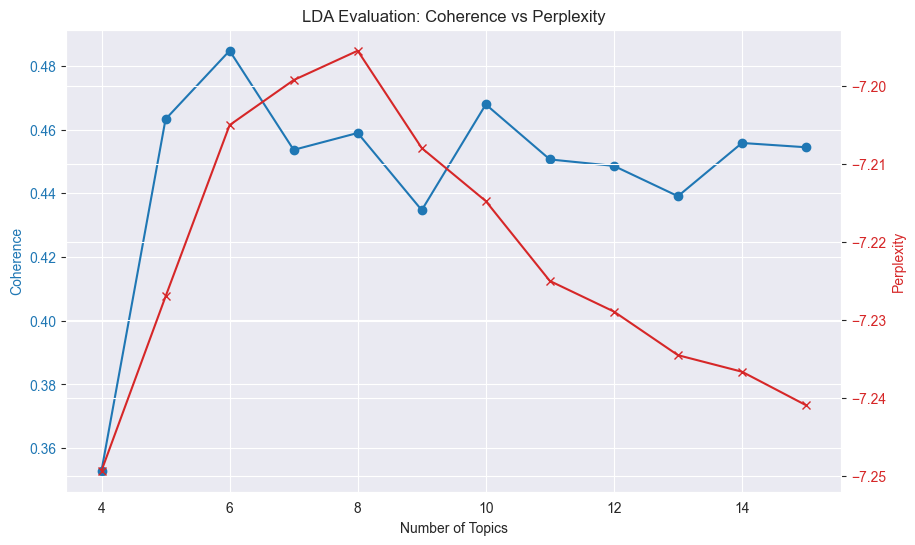

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel("Number of Topics")
ax1.set_ylabel("Coherence", color=color)
ax1.plot(topics_range, coherence_values, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Ref from: https://www.geeksforgeeks.org/matplotlib-axes-axes-twinx-in-python/
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Perplexity", color=color)
ax2.plot(topics_range, perplexity_values, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("LDA Evaluation: Coherence vs Perplexity")
plt.grid(True)
plt.show()

We used both Coherence and Perplexity to evaluate the LDA models. Coherence focuses on topic interpretability — how well the top words of each topic "go together". Perplexity tells us how well the model predicts the original data, hence lower is better. Ideally, we want high coherence and low perplexity, but in practice we focused on **coherence**, since our goal is to extract meaningful topics from job descriptions.

In [36]:
best_lda_model.show_topics(num_topics=-1, num_words=10, log=False, formatted=True)

[(0,
  '0.015*"research" + 0.013*"health" + 0.009*"development" + 0.008*"clinical" + 0.008*"include" + 0.007*"care" + 0.006*"medical" + 0.006*"team" + 0.006*"scientist" + 0.006*"laboratory"'),
 (1,
  '0.016*"status" + 0.014*"employment" + 0.013*"opportunity" + 0.011*"disability" + 0.011*"gender" + 0.010*"equal" + 0.010*"information" + 0.009*"applicant" + 0.009*"veteran" + 0.009*"protect"'),
 (2,
  '0.034*"business" + 0.013*"process" + 0.012*"requirement" + 0.012*"project" + 0.011*"team" + 0.010*"skill" + 0.010*"analysis" + 0.010*"management" + 0.010*"ability" + 0.009*"data"'),
 (3,
  '0.010*"system" + 0.008*"management" + 0.008*"include" + 0.008*"support" + 0.008*"require" + 0.008*"position" + 0.008*"provide" + 0.007*"program" + 0.007*"year" + 0.007*"service"'),
 (4,
  '0.016*"team" + 0.011*"data" + 0.010*"business" + 0.009*"product" + 0.008*"company" + 0.008*"build" + 0.007*"customer" + 0.007*"help" + 0.007*"analytic" + 0.007*"drive"'),
 (5,
  '0.029*"data" + 0.013*"year" + 0.013*"eng

In [37]:
# topic distribution for each document
def get_document_topic_vector(lda_model, bow):
    topic_dist = lda_model.get_document_topics(bow, minimum_probability=0)
    return np.array([prob for _, prob in sorted(topic_dist, key=lambda x: x[0])])

# every row in X_train_lda is now a vector of length num_topics with the probability over topics for that document.
X_train_lda = np.array([get_document_topic_vector(best_lda_model, bow) for bow in corpus])

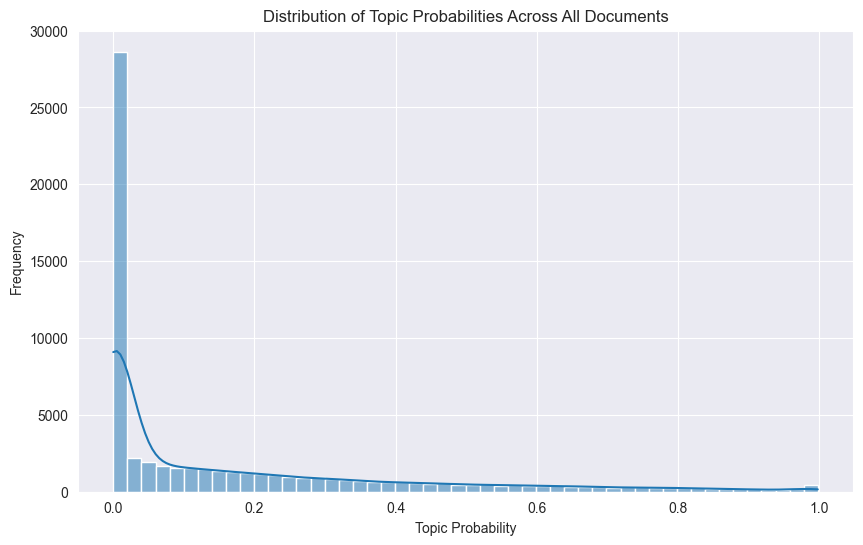

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train_lda.flatten(), bins=50, kde=True)
plt.xlabel("Topic Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Topic Probabilities Across All Documents")
plt.show()

In [39]:
topics_words = []
for topic_id in range(best_num_topics):
    words_probs = best_lda_model.show_topic(topic_id, topn=10)
    topics_words.append([word for word, prob in words_probs])

# convert to DataFrame
df_topics = pd.DataFrame(topics_words).T
df_topics.columns = [f"Topic {i}" for i in range(best_num_topics)]
df_topics

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,research,status,business,system,team,data
1,health,employment,process,management,data,year
2,development,opportunity,requirement,include,business,engineer
3,clinical,disability,project,support,product,design
4,include,gender,team,require,company,technology
5,care,equal,skill,position,build,software
6,medical,information,analysis,provide,customer,cloud
7,team,applicant,management,program,help,development
8,scientist,veteran,ability,year,analytic,system
9,laboratory,protect,data,service,drive,engineering


Let's see more deeply how each topic is composed and the weight of each of the words that define it.

### Top words per topic (with weights)

Let's visualize the top 15 most relevant words for all the topics extracted by the LDA model. This helps us understand what each topic is about by inspecting the most representative terms.


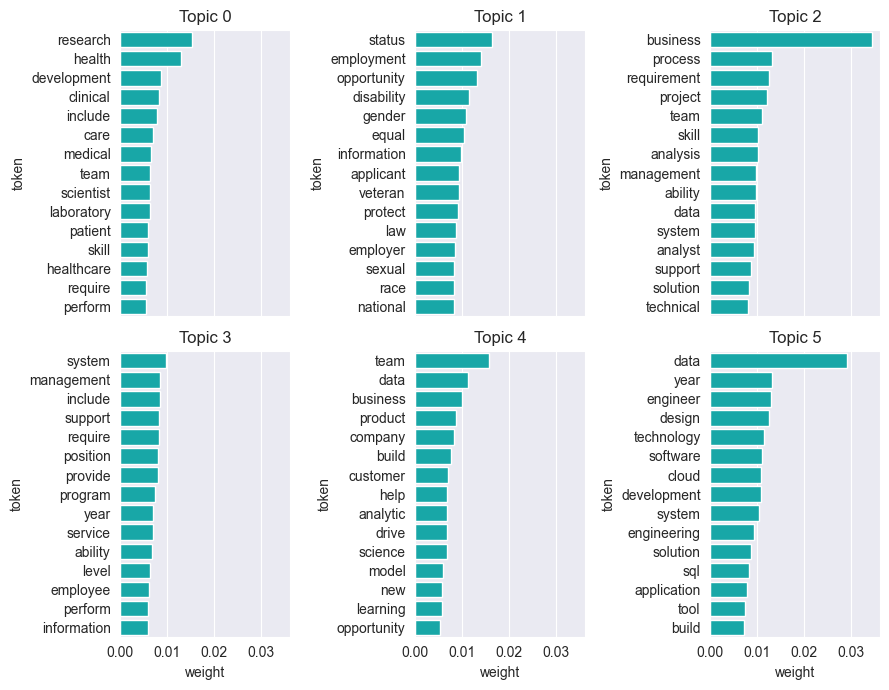

In [41]:
import math

n_of_words = 15

# calculate number of rows and columns for the subplot grid
cols = 3
rows = math.ceil(best_num_topics / cols)

fig, axes = plt.subplots(rows, cols, figsize=(9, rows * 3.5), sharex=True)

# flatten axes in case rows = 1
axes = axes.flatten()

for i in range(best_num_topics):
    topic = best_lda_model.show_topic(i, topn=n_of_words)
    df = pd.DataFrame(topic, columns=['token', 'weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[i])
    axes[i].set_title(f"Topic {i}")

# remove any empty subplots (if n_topics % cols != 0)
for j in range(best_num_topics, len(axes)):
    fig.delaxes(axes[j])
    
plt.suptitle("Top 15 Words per Topic (original LDA topic IDs)", fontsize=14)
plt.tight_layout()
plt.show()


### Interactive topic exploration (pyLDAvis)

In [42]:
# !pip install pyLDAvis

^C


In [44]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# en colab o jupyter notebook
# # load interactive visualisation
# pyLDAvis.enable_notebook()
# 
# # show the model's topic structure
# vis_data = gensimvis.prepare(best_lda_model, corpus, dict)
# vis_data


# for pycharm
vis_data = gensimvis.prepare(best_lda_model, corpus, dict)

# save as html
pyLDAvis.save_html(vis_data, 'lda_vis.html')


In the graph can be appreciated the influence of the $\lambda$ parameter. It is used as a multiplier of the probability of a word belonging to a term in the formula:
$$\text{relevance}(w \mid t) = \lambda \cdot p(w \mid t) + (1 - \lambda) \cdot \frac{p(w \mid t)}{p(w)}
$$
In simple terms, the higher, the value of $\lambda$ ($\lambda \approx 1$) shows really frequent words without taking into accounts their exclusivity in that topic, whether $\lambda \approx 0$, shows the most exclusive words in that topic without having into account how frequent they are.

For this trade-off we chose a value different values to study for our analysis in the report. And we obtained several insights. (Note: that the number of the topics do not coincide with the original IDs of the topics in previous parts.)
- Topic 0 ( Topic 6 in pyLDAvis graph) is the smallest topic distribution (it is only represented by a 7.4% of the tokens) but it is really deterministic. Research, health, clinical staph are mostly gathered here, so that helps to identify that this job postings are collecting this part of the Applied Artificial Intelligence to the Medicine)
- Topic 1 (Topic 4 in pyLDavis graph) records job offers where equality in terms of law, status, gender or disability are essential. Most of these postings reflect companies where social benefits and equality play a key role.
- Topic 2 (Topic 1 in pyLDAvis graph) is the largest topic distribution. It centers around business processes, project requirements, and management. This topic is characteristic of job postings that focus on organizational and business analyst roles, often tied to operations or consulting positions.
- Topic 3 (Topic 3 in pyLDAvis graph) appears to be more general-purpose, with recurring terms like system, management, support, and security. These postings are likely associated with roles that emphasize management positions, probably not that related to purely technical staff.
- Topic 4 (Topic 2 in pyLDAvis graph) is highly related to topic 2, but it could be appreciated a bit more of technical details in the terms contained such as machine learning, algorithm, quantitative, science (and a slight displacement in the PC1 axis of LDAvis graph). Probably these job postings relate more to Data Scientist jobs.
- Topic 5 (Topic 5 in pyLDAvis graph) is strongly technical. Terms such as data, engineer, software, cloud, and SQL suggest this topic encompasses core tech jobs, especially in software engineering, data engineering, and cloud computing.

### Topic definition in dictionary

In [50]:
topic_names = {
    0: "Healthcare & Research",
    1: "Equality Consciousness",
    2: "Business Analysts & Project Management",
    3: "Management & High paid roles",
    4: "Data Science & ML",
    5: "Data Engineering & Cloud"
}

#### UMAP + KMeans visualization

This analysis complements pyLDAvis by offering a document-level perspective: while pyLDAvis helps us understand how tokens define topics, this other approach helps us see how documents are organized and separated in the latent topic space.



In [45]:
import umap.umap_ as umap

# reduce dimensions to 2D using UMAP
# ref: https://www.hackersrealm.net/post/dimensionality-reduction-machine-learning-python
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
doc_topics_2d = umap_model.fit_transform(X_train_lda)

# cluster documents using KMeans
kmeans = KMeans(n_clusters=best_num_topics, random_state=42)
labels = kmeans.fit_predict(X_train_lda)

C:\Users\Iker\cuarto_carrera\proyectos_cuarto\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


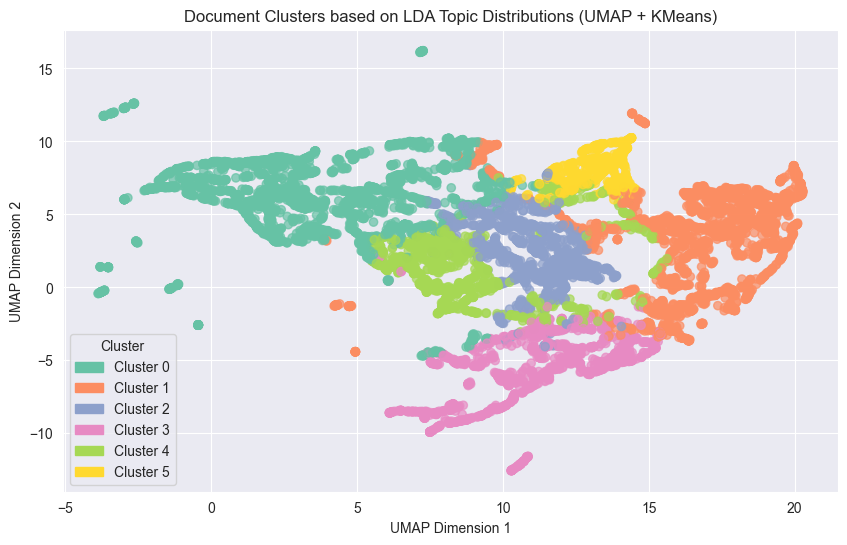

In [49]:
palette = sns.color_palette("Set2", 6)  

plt.figure(figsize=(10, 6))
scatter = plt.scatter(doc_topics_2d[:, 0], doc_topics_2d[:, 1], c=[palette[i] for i in labels], alpha=0.7)
plt.title("Document Clusters based on LDA Topic Distributions (UMAP + KMeans)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=palette[i], label=f"Cluster {i}") for i in range(6)]
plt.legend(handles=legend_handles, title="Cluster")
plt.show()

- Each dot is a doc, placed based on how similar its topics are to others (UMAP projection).
Colors show clusters identified by KMeans that was set equal to the best_number of documents for easier visualization.
Then is simple to know that close dots are really similar jobs and different colors are different groups of jobs based on topic similarity.
- The more separated the colors, the clearer the topic difference between clusters. 

### *There are more vectorization techniques implemented in the Task 2: Regression. Such as Doc2Vec or SBERT transformer. Details of those will be seen later on and in the report*

# Task 2:
 Although we have already analysed some clustering techniques (task 2.2) to compare and see performances of some of the models obtained in Task 1, we decided that our main focus on Task 2 was going to be **Regression**.
# Regression
For this regression task, we decided to use `High_salary_estimate (K)` as our target variable. This choice is motivated by the fact that salary is a real-valued, continuous outcome that is really relevant in the context of job offers. We decided not to choose `Low_salary_estimate (K)` nor the mean of both, because it could lead to baseline uniformative numbers or invented data that can cause confusion respectively.

Additionally, predicting salary based on textual and structured metadata aligns well with real use cases such as LinkedIn, Glassdoor, or Salary Monkeys (an open web created by some UC3M students).

### Preprocess

Here we will treat and process categorical and numerical variables along side with document embeddings. 

* Categorical Variables: First rare categories will be grouped into an 'Other' category to avoid super high dimensionality and sparse data
* Numerical variables: Standarization
* Vector column: Process correctly the embeddings

In [2]:
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

def preprocess_df(df_train, df_test, df_vector_column: str): 
    # structured features 
    # (we drop Job Title and Description as its obvious)
    categorical_cols = ['Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
                        'Industry', 'Sector', 'Revenue']
    # 'Low_salary_estimate (K)' removed because it would make no sense
    numerical_cols = ['Rating', ]

    # target variable
    target_col = 'High_salary_estimate (K)'

    # Replace rare categories in both train and test with 'Other'
    def replace_rare(df_train, df_test, col):
        freq = df_train[col].value_counts()
        rare_vals = freq[freq == 1].index
        df_train[col] = df_train[col].replace(rare_vals, 'Other')
        df_test[col] = df_test[col].replace(rare_vals, 'Other')  # align with train
        return df_train, df_test
        
    for col in categorical_cols:
        df_train, df_test = replace_rare(df_train, df_test, col)

    # Build feature sets
    X_struct_train = df_train[categorical_cols + numerical_cols].copy()
    X_struct_train[df_vector_column] = df_train[df_vector_column]
    y_train = df_train[target_col]

    X_struct_test = df_test[categorical_cols + numerical_cols].copy()
    X_struct_test[df_vector_column] = df_test[df_vector_column]
    y_test = df_test[target_col]


    # custom transformer to pass FastText matrix into the pipeline
    class VectorEmbedder(BaseEstimator, TransformerMixin):
        def __init__(self, vector_column):
            self.vector_column = vector_column

        def fit(self, X, y=None):
            return self

        def transform(self, X):
            # Assumes each row in the column is a 1D NumPy array
            return np.vstack(X[self.vector_column].values)

    # preprocess structured features
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    numeric_transformer = StandardScaler()

    preprocessor = ColumnTransformer([
        ("cat", categorical_transformer, categorical_cols),
        ("num", numeric_transformer, numerical_cols)
    ])

    # combine structured features + vector text
    combined_features = FeatureUnion([
        ("structured", preprocessor),
        ("vector_embeddings", VectorEmbedder(vector_column=df_vector_column))
    ])

    # Transform full train/test sets
    X_train_combined = combined_features.fit_transform(X_struct_train)
    X_test_combined = combined_features.transform(X_struct_test)

    return X_train_combined, X_test_combined, y_train, y_test

### First Model: MLP (job desc. embeddings + metadata)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


A basic MLP to avoid overfitting. 4 layers with batch normalization and dropout

In [4]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, dropout_rate):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(dropout_rate)
    
    def forward(self, x):
        x = self.dropout(F.relu(self.bn1(self.fc1(x))))
        x = self.dropout(F.relu(self.bn2(self.fc2(x))))
        x = self.dropout(F.relu(self.bn3(self.fc3(x))))
        x = self.fc4(x) 
        return x

* Loss: MSE
* Optimizer AdamW with CosineAnnealing and weight decay to avoid overfitting
* Early Stopping
* Plot loss and rmse

In [5]:
def train_mlp(X_train_combined, X_val, X_test, y_train, y_val, y_test, best_model_name):

    X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)
    
    # Create TensorDatasets and DataLoaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)
    
    batch_size = 128 
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # i only need shuffled in train because we do not need order to predict in val or test set
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create model, loss function and optimizer
    input_size = X_train_tensor.shape[1]  
    model_mlp = SimpleMLP(input_size=input_size, dropout_rate=0.4).to(device)
    optimizer = torch.optim.AdamW(model_mlp.parameters(), lr=0.001, weight_decay=0.01) # higher weight_decay, stronger regularization
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-5)# T_max = Number of steps (usually epochs) to anneal over, #eta_min =Minimum learning rate
    criterion = nn.MSELoss()
    
    # Parameters for early stopping
    patience = 50  # Number of epochs to wait after no improvement
    best_val_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False
    checkpoint_path = f'{best_model_name}.pt'  # Save the best model
    
    # Lists to store metrics
    num_epochs = 1000
    train_losses, val_losses, test_losses = [], [], []
    train_rmse, val_rmse, test_rmse = [], [], []
    
    for epoch in range(num_epochs):
        if early_stop:
            print(f"Early stopping at epoch {epoch}")
            break
    
        all_preds_train, all_targets_train, all_preds_val, all_targets_val, all_preds_test, all_targets_test = [], [], [], [], [], []
    
        model_mlp.train()
        epoch_train_loss = 0.0
        for batch_data, y_values in train_loader:
            batch_data, y_values = batch_data.to(device), y_values.to(device)
            optimizer.zero_grad()
            outputs = model_mlp(batch_data)
            loss = criterion(outputs, y_values.unsqueeze(1))
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * batch_data.size(0)
    
            all_preds_train.append(outputs.detach().cpu())
            all_targets_train.append(y_values.unsqueeze(1).detach().cpu())
    
        epoch_train_loss /= len(train_loader.dataset)
        train_losses.append(epoch_train_loss)
    
        all_preds_train = torch.cat(all_preds_train).numpy()
        all_targets_train = torch.cat(all_targets_train).numpy()
        train_rmse.append(mean_squared_error(all_targets_train, all_preds_train, squared=False))
    
        model_mlp.eval()
        with torch.no_grad():
            # Validation
            epoch_val_loss = 0.0
            for batch_data, y_values in val_loader:
                batch_data, y_values = batch_data.to(device), y_values.to(device)
                outputs = model_mlp(batch_data)
                loss = criterion(outputs, y_values.unsqueeze(1))
                epoch_val_loss += loss.item() * batch_data.size(0)
    
                all_preds_val.append(outputs.detach().cpu())
                all_targets_val.append(y_values.unsqueeze(1).detach().cpu())
    
            epoch_val_loss /= len(val_loader.dataset)
            val_losses.append(epoch_val_loss)
    
            all_preds_val = torch.cat(all_preds_val).numpy()
            all_targets_val = torch.cat(all_targets_val).numpy()
            val_rmse.append(mean_squared_error(all_targets_val, all_preds_val, squared=False))
    
            # Early stopping logic
            if epoch_val_loss < best_val_loss:
                best_val_loss = epoch_val_loss
                epochs_no_improve = 0
                torch.save(model_mlp.state_dict(), checkpoint_path)
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    early_stop = True
                    print(f"Validation loss did not improve. Early stopping triggered at epoch: {epoch}")
                    break
    
            # Test
            epoch_test_loss = 0.0
            for batch_data, y_values in test_loader:
                batch_data, y_values = batch_data.to(device), y_values.to(device)
                outputs = model_mlp(batch_data)
                loss = criterion(outputs, y_values.unsqueeze(1))
                epoch_test_loss += loss.item() * batch_data.size(0)
    
                all_preds_test.append(outputs.detach().cpu())
                all_targets_test.append(y_values.unsqueeze(1).detach().cpu())
    
            epoch_test_loss /= len(test_loader.dataset)
            test_losses.append(epoch_test_loss)
    
            all_preds_test = torch.cat(all_preds_test).numpy()
            all_targets_test = torch.cat(all_targets_test).numpy()
            test_rmse.append(mean_squared_error(all_targets_test, all_preds_test, squared=False))
    
        scheduler.step()
        
        # Print metrics every 50 epochs (and the first epoch)
        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{num_epochs}: Train loss: {epoch_train_loss:.2f}, "
                  f"Val loss: {epoch_val_loss:.2f}, Test loss: {epoch_test_loss:.2f}, "
                f"Train rmse: {train_rmse[-1]:.2f}, "
                  f"Val rmse: {val_rmse[-1]:.2f}, Test rmse: {test_rmse[-1]:.2f}, ")

    # print last epoch
    print(f"Epoch {epoch+1}/{num_epochs}: Train loss: {epoch_train_loss:.2f}, "
                  f"Val loss: {epoch_val_loss:.2f}, Test loss: {epoch_test_loss:.2f} ||"
                f"Train rmse: {train_rmse[-1]:.2f}, "
                  f"Val rmse: {val_rmse[-1]:.2f}, Test rmse: {test_rmse[-1]:.2f}")

    # Plot the overall loss curves
    plt.figure(figsize=(4,3))
    plt.plot(range(epoch+1), train_losses, label='Train loss')
    plt.plot(range(epoch+1), val_losses, label='Validation loss')
    plt.plot(range(epoch), test_losses, label='Test loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss curves over epochs')
    plt.legend()
    plt.show()
    
    # Plot the overall rmse curves
    plt.figure(figsize=(4,3))
    plt.plot(range(epoch+1), train_rmse, label='Train rmse')
    plt.plot(range(epoch+1), val_rmse, label='Validation rmse')
    plt.plot(range(epoch), test_rmse, label='Test rmse')
    plt.xlabel('Epoch')
    plt.ylabel('rmse')
    plt.title('rmse curves over epochs')
    plt.legend()
    plt.show()

    return model_mlp.load_state_dict(torch.load("/kaggle/working/" + checkpoint_path, weights_only=True))

### First embeddings, Fasttext

Epoch 1/1000: Train loss: 14122.40, Val loss: 13553.03, Test loss: 13608.18, Train rmse: 118.84, Val rmse: 116.42, Test rmse: 116.65, 
Epoch 50/1000: Train loss: 924.97, Val loss: 1582.38, Test loss: 1673.49, Train rmse: 30.41, Val rmse: 39.78, Test rmse: 40.91, 
Epoch 100/1000: Train loss: 871.34, Val loss: 1586.70, Test loss: 1707.49, Train rmse: 29.52, Val rmse: 39.83, Test rmse: 41.32, 
Validation loss did not improve. Early stopping triggered at epoch: 109
Epoch 110/1000: Train loss: 772.02, Val loss: 1591.73, Test loss: 1720.02 ||Train rmse: 27.79, Val rmse: 39.90, Test rmse: 41.47


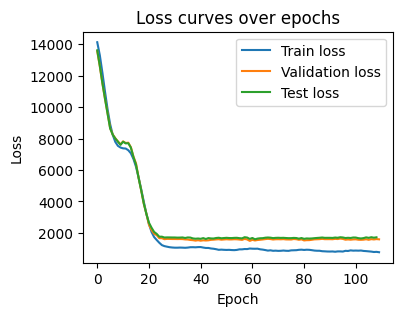

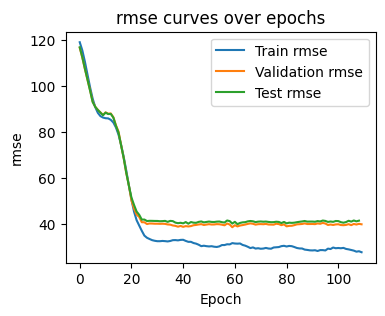

In [6]:
X_train_combined, X_test_combined, y_train, y_test = preprocess_df(df_train, df_test, df_vector_column = "fasttext_vector")

X_val, X_test, y_val, y_test = train_test_split(
        X_test_combined, y_test, test_size=0.5, random_state=42)

model_mlp_fasttext = train_mlp(X_train_combined, X_val, X_test, y_train, y_val, y_test, "best_mlp_fasttext")

### Now try with Doc2Vec

Extract the embeddings for both dataframes

In [7]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

for df_curr in [df_train, df_test]:
    documents = df_curr["processed_text_filtered"]
    
    # Preprocess: tokenize and tag
    tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(documents)]
    
    # Initialize and train model
    # vector_size: Size of the output vector., window: Context window size., 
    # min_count: Ignores words with total frequency lower than this., epochs: Number of training iterations.
    model = Doc2Vec(vector_size=20, window=2, min_count=1, workers=4, epochs=50)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
    
    # get the document vectors
    df_curr["doc2vec_vector"] = [model.infer_vector(
        word_tokenize(doc.lower())) for doc in documents]

Similar results as Fasttext

Epoch 1/1000: Train loss: 14145.96, Val loss: 13563.76, Test loss: 13573.00, Train rmse: 118.94, Val rmse: 116.46, Test rmse: 116.50, 
Epoch 50/1000: Train loss: 811.51, Val loss: 1659.54, Test loss: 1720.33, Train rmse: 28.49, Val rmse: 40.74, Test rmse: 41.48, 
Validation loss did not improve. Early stopping triggered at epoch: 92
Epoch 93/1000: Train loss: 718.86, Val loss: 1639.63, Test loss: 1724.40 ||Train rmse: 26.81, Val rmse: 40.49, Test rmse: 41.53


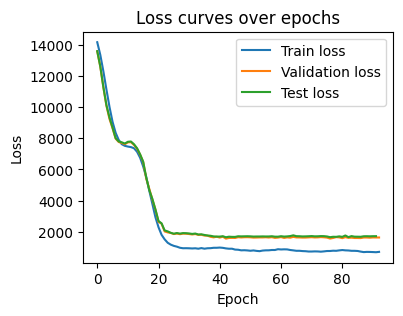

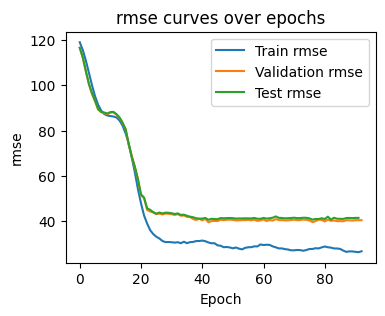

In [8]:
X_train_combined, X_test_combined, y_train, y_test = preprocess_df(df_train, df_test, df_vector_column = "doc2vec_vector")

X_val, X_test, y_val, y_test = train_test_split(
        X_test_combined, y_test, test_size=0.5, random_state=42)

model_mlp_doc2vec = train_mlp(X_train_combined, X_val, X_test, y_train, y_val, y_test, "best_mlp_doc2vec")

### LDA's turn

Compute lda's embeddings with the already trained model

In [9]:
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary

X_lda_list = []
for df_curr in [df_train, df_test]: 
    # tokenize processed text (using processed_text, NOT processed_text_filtered)
    # This helps not to be biased by the previous TF-IDF filtering.
    texts_bow = df_curr['processed_text'].dropna().apply(lambda x: x.split()).tolist()
    dict = Dictionary(texts_bow)
    
    # filter extremes (this is where you remove rare and too frequent words → clean BoW version)
    dict.filter_extremes(no_below=3, no_above=0.8)
    
    # create BoW corpus
    corpus = [dict.doc2bow(text) for text in texts_bow]
    
    best_lda_model = LdaModel.load("/kaggle/input/model-lda-fol/model_lda/best_lda_model.gensim")
    
    # topic distribution for each document
    def get_document_topic_vector(lda_model, bow):
        topic_dist = lda_model.get_document_topics(bow, minimum_probability=0)
        return np.array([prob for _, prob in sorted(topic_dist, key=lambda x: x[0])])
    
    # every row in X_train_lda is now a vector of length num_topics with the probability over topics for that document.
    X_lda = np.array([get_document_topic_vector(best_lda_model, bow) for bow in corpus])
    X_lda_list.append(X_lda)

In [10]:
# format correctly
df_train['lda_vector'] = [np.array(vec) for vec in X_lda_list[0]]
df_test['lda_vector'] = [np.array(vec) for vec in X_lda_list[1]]

Worse results

Epoch 1/1000: Train loss: 14074.51, Val loss: 13797.27, Test loss: 13837.36, Train rmse: 118.64, Val rmse: 117.46, Test rmse: 117.63, 
Epoch 50/1000: Train loss: 937.11, Val loss: 1717.15, Test loss: 1825.14, Train rmse: 30.61, Val rmse: 41.44, Test rmse: 42.72, 
Validation loss did not improve. Early stopping triggered at epoch: 95
Epoch 96/1000: Train loss: 879.73, Val loss: 1814.48, Test loss: 1845.55 ||Train rmse: 29.66, Val rmse: 42.60, Test rmse: 42.96


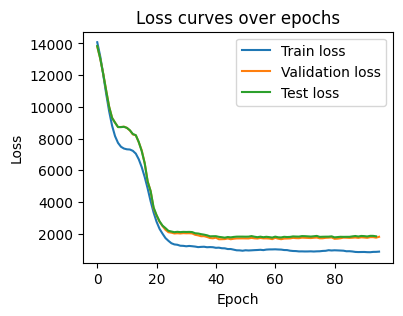

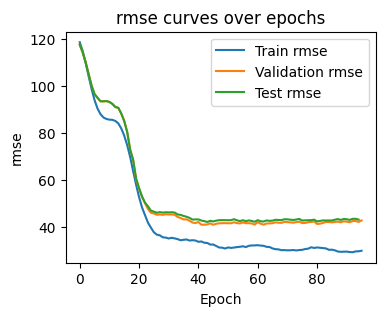

In [11]:
X_train_combined, X_test_combined, y_train, y_test = preprocess_df(df_train, df_test, df_vector_column = "lda_vector")

X_val, X_test, y_val, y_test = train_test_split(
        X_test_combined, y_test, test_size=0.5, random_state=42)

model_mlp_lda = train_mlp(X_train_combined, X_val, X_test, y_train, y_val, y_test, "best_mlp_lda")

### SBERT embeddings (Sentence-BERT - SentenceTransformers)

Pre-trained transformer from HuggingFace. SBERT instead of a Sequence Classification, SBERT (Mini-L6-v2) embeddes sentences, it was select for its efficiency since we used kaggle GPU's and we have a large corpus other transformers models where out of our scope due to extensive inference times

References:
[ https://anirbansen2709.medium.com/sbert-how-to-use-sentence-embeddings-to-solve-real-world-problems-f950aa300c72 ]
[ https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2 ]

In [12]:
# install some package to improve the storage system with Xet
!pip install huggingface_hub[hf_xet]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 MB 33.7 MB/s eta 0:00:00:00:0100:01


We can directly use the instructions in hugging face (https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) but we had to add batches system so we did not avoid running out of memory

In [13]:
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

#Mean Pooling .Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def sbert_embed_sentences(sentences):
    # load model from HuggingFace Hub
    tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
    sbert_model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
    sbert_model.to(device)
    sbert_model.eval()
    batch_size = 32  
    all_embeddings = []
    
    # Batched processing
    for i in tqdm(range(0, len(sentences), batch_size)):
        batch = sentences[i:i+batch_size]
        # Tokenize sentences
        encoded_input = tokenizer(batch, padding=True, truncation=True, return_tensors='pt')
        encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
    
        # Compute token embeddings
        with torch.no_grad():
            model_output = sbert_model(**encoded_input)
    
        # Perform pooling
        embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
        # Normalize embeddings
        embeddings = F.normalize(embeddings, p=2, dim=1)
    
        all_embeddings.append(embeddings.cpu())
    
    # Combine all batches into one tensor
    sentence_embeddings = torch.cat(all_embeddings, dim=0)
    
    return [np.array(vec) for vec in sentence_embeddings]

Call the function and extract SBERT embeddings for train and test

In [14]:
# Sentences we want sentence embeddings for
sentences_train = df_train["processed_text"].tolist()
df_train["sbert_vector"] = sbert_embed_sentences(sentences_train)

sentences_test = df_test["processed_text"].tolist()
df_test["sbert_vector"] = sbert_embed_sentences(sentences_test)

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

2025-05-11 10:09:57.152443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746958197.331511      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746958197.382299      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

100%|██████████| 80/80 [00:08<00:00,  8.92it/s]


In [30]:
# stop the tokenizers library from using multiple threads or processes since we will not use the library again
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

Train the model

Epoch 1/1000: Train loss: 14072.56, Val loss: 13500.56, Test loss: 13529.11, Train rmse: 118.63, Val rmse: 116.19, Test rmse: 116.31, 
Epoch 50/1000: Train loss: 779.74, Val loss: 1567.91, Test loss: 1735.76, Train rmse: 27.92, Val rmse: 39.60, Test rmse: 41.66, 
Validation loss did not improve. Early stopping triggered at epoch: 90
Epoch 91/1000: Train loss: 661.96, Val loss: 1625.76, Test loss: 1788.42 ||Train rmse: 25.73, Val rmse: 40.32, Test rmse: 42.29


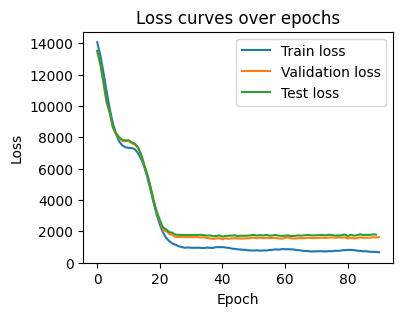

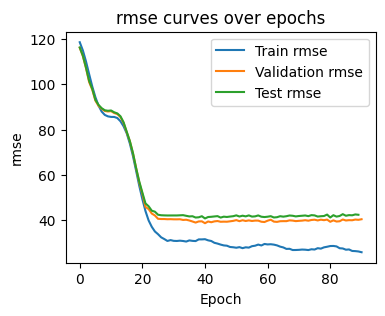

In [16]:
X_train_combined, X_test_combined, y_train, y_test = preprocess_df(df_train, df_test, df_vector_column = "sbert_vector")

X_val, X_test, y_val, y_test = train_test_split(
        X_test_combined, y_test, test_size=0.5, random_state=42)

model_mlp_lda = train_mlp(X_train_combined, X_val, X_test, y_train, y_val, y_test, "best_mlp_sbert")

In [17]:
# save to reuse other times
df_train.to_pickle("ALL_EMBEDINGS_train.pkl")
df_test.to_pickle("ALL_EMBEDINGS_test.pkl")

### XGBoost

Since we had not the best results with MLP, probably due to overfitting, let's try with more standard and simple model, XGBoost.

* This time we had included a feature selection using *SelectKBest* with the 20 best features in f_regression (most suitable to our type of problem)
* To tune the hyperparameters we used a RandomSearchCV with a 3-fold Cross Validation system

In [18]:
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import xgboost as xgb

def train_xgb_model(X_train_combined, X_test_combined, y_train, y_test): 
    # Feature selection
    selector = SelectKBest(score_func=f_regression, k=20)
    
    selector.fit(X_train_combined, y_train)
    X_train_selected = selector.transform(X_train_combined)
    X_test_selected = selector.transform(X_test_combined)

    # Define Stratified K-Fold Cross-Validation
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)

    # LightGBM regressor
    xgb_regressor = xgb.XGBRegressor(random_state=42, verbosity=0, device = "cuda")

    # Define the hyperparameter search space for RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 15),
        'learning_rate': uniform(0.01, 0.1),
        'subsample': uniform(0.7, 0.3),
        'colsample_bytree': uniform(0.7, 0.3)
    }

    random_search = RandomizedSearchCV(
        estimator=xgb_regressor,
        param_distributions=param_dist,
        n_iter=20,  
        cv=kfold,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=-1,
        random_state=42
    )
    random_search.fit(X_train_selected, y_train)

    # Get the best model from the search
    best_model = random_search.best_estimator_

    # Evaluate the model
    y_pred = best_model.predict(X_test_selected)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Best parameters: {random_search.best_params_}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    return best_model, random_search

In [21]:
import pickle

Fasttext

In [22]:
X_train_combined, X_test_combined, y_train, y_test = preprocess_df(df_train, df_test, df_vector_column = "fasttext_vector")

best_model_fasttext, random_search_fasttext = train_xgb_model(X_train_combined, X_test_combined, y_train, y_test)

with open("xgb_model_fasttext.pkl", "wb") as f:
    pickle.dump(best_model_fasttext, f)

Best parameters: {'colsample_bytree': 0.9550115733369398, 'learning_rate': 0.054945067413820346, 'max_depth': 3, 'n_estimators': 147, 'subsample': 0.8112454756594799}
RMSE: 37.95
MAE: 30.03


Doc2Vec

In [23]:
X_train_combined, X_test_combined, y_train, y_test = preprocess_df(df_train, df_test, df_vector_column = "doc2vec_vector")

best_model_doc2vec, random_search_doc2vec = train_xgb_model(X_train_combined, X_test_combined, y_train, y_test)

with open("xgb_model_doc2vec.pkl", "wb") as f:
    pickle.dump(best_model_doc2vec, f)

Best parameters: {'colsample_bytree': 0.9499584735208493, 'learning_rate': 0.02733646535077721, 'max_depth': 3, 'n_estimators': 263, 'subsample': 0.7546708263364187}
RMSE: 37.03
MAE: 29.84


LDA

In [24]:
X_train_combined, X_test_combined, y_train, y_test = preprocess_df(df_train, df_test, df_vector_column = "lda_vector")

best_model_lda, random_search_lda = train_xgb_model(X_train_combined, X_test_combined, y_train, y_test)

with open("xgb_model_lda.pkl", "wb") as f:
    pickle.dump(best_model_lda, f)

Best parameters: {'colsample_bytree': 0.7016566351370807, 'learning_rate': 0.09154614284548342, 'max_depth': 3, 'n_estimators': 235, 'subsample': 0.9187021504122961}
RMSE: 39.12
MAE: 30.20


SBERT

In [25]:
X_train_combined, X_test_combined, y_train, y_test = preprocess_df(df_train, df_test, df_vector_column = "sbert_vector")

best_model_sbert, random_search_sbert = train_xgb_model(X_train_combined, X_test_combined, y_train, y_test)

with open("xgb_model_sbert.pkl", "wb") as f:
    pickle.dump(best_model_sbert, f)

Best parameters: {'colsample_bytree': 0.9499584735208493, 'learning_rate': 0.02733646535077721, 'max_depth': 3, 'n_estimators': 263, 'subsample': 0.7546708263364187}
RMSE: 37.25
MAE: 29.54


We have improved our prediction by -5 RMSE. 

Notice how all 4 models had the minimun depth=3, indicating that more complex models overfitted.

All xgboost models perform similary, highlighting SBERT and Doc2Vec ones. Because of the poor quality of Glassdors salaries it was not possible for us to reach lower levels of RMSE

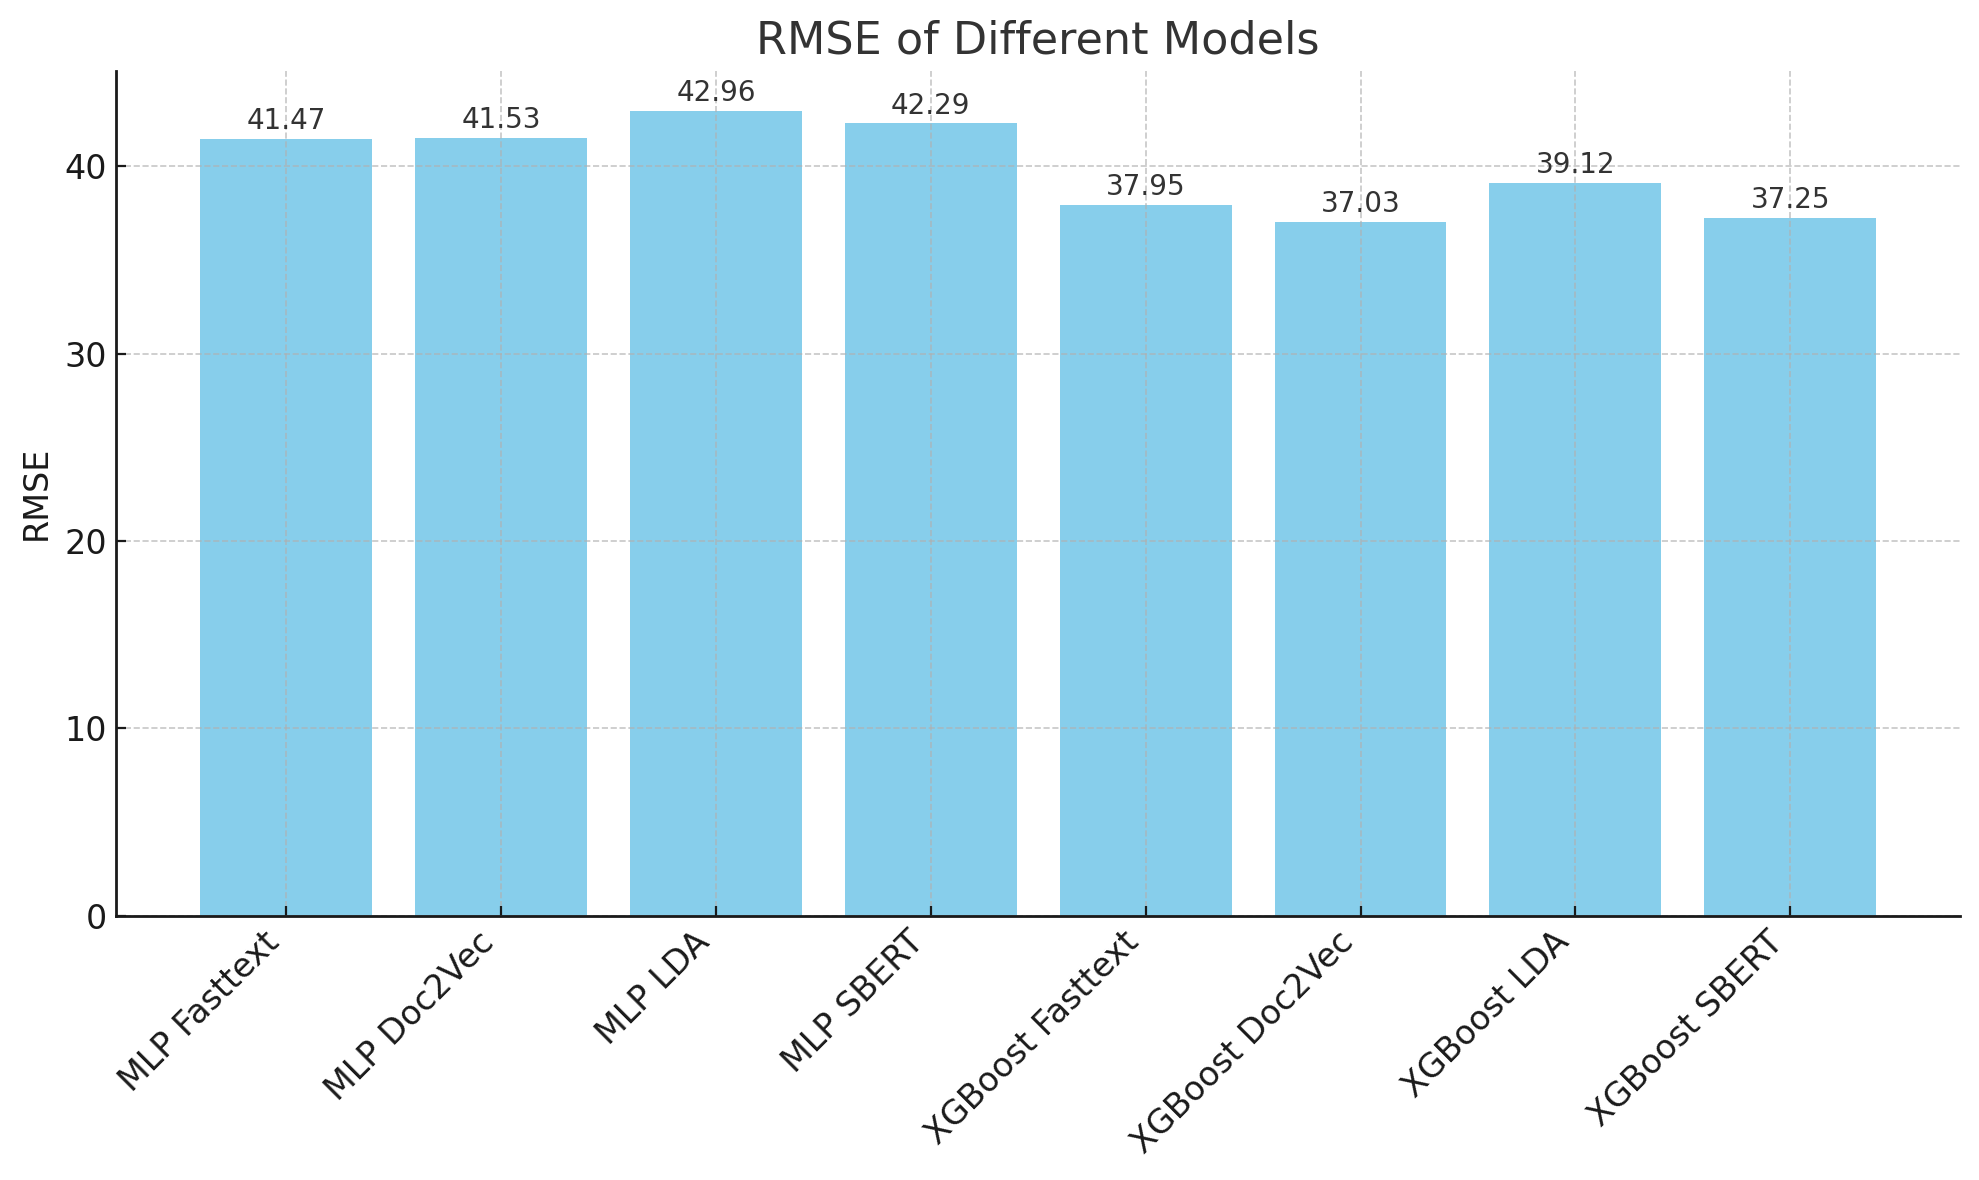
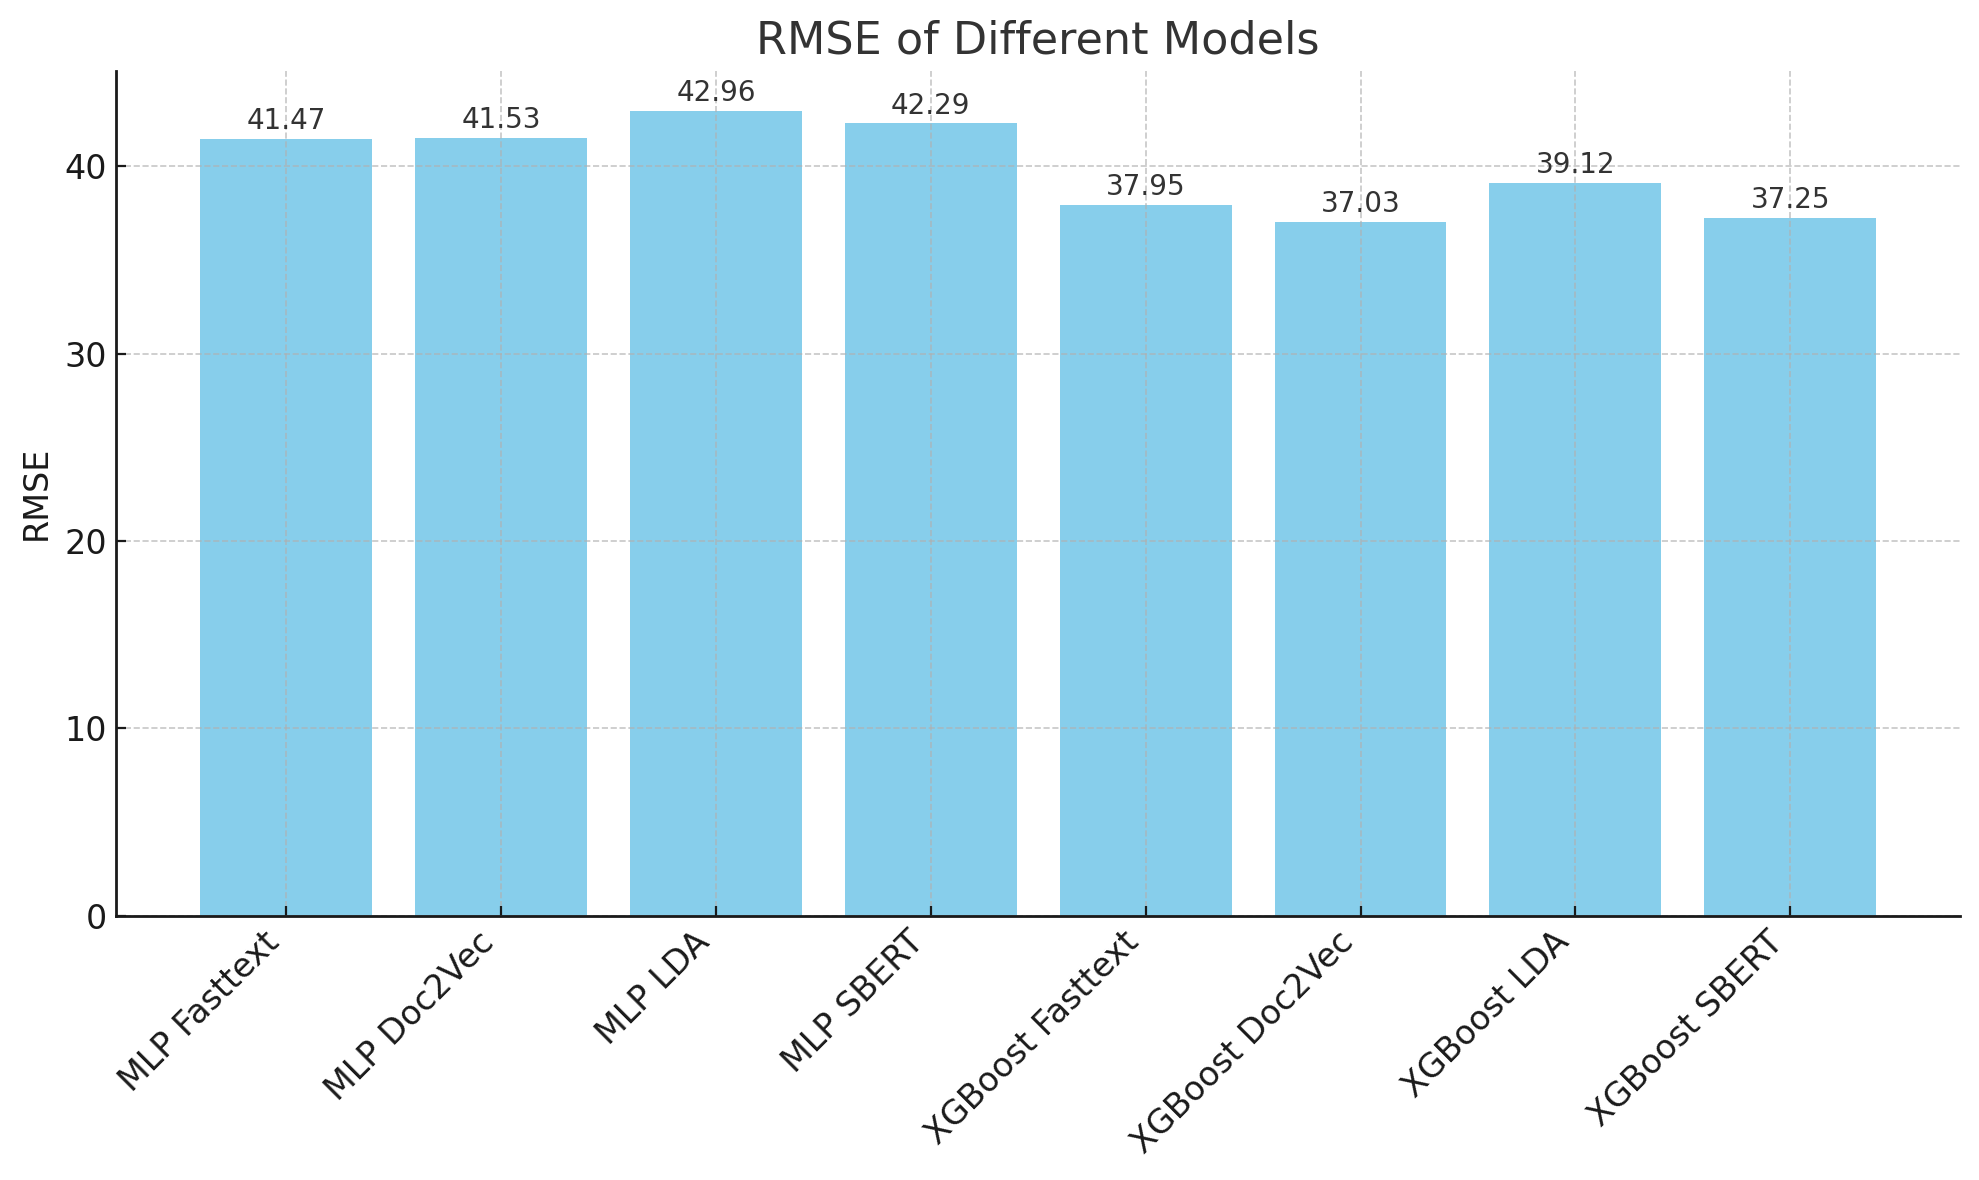
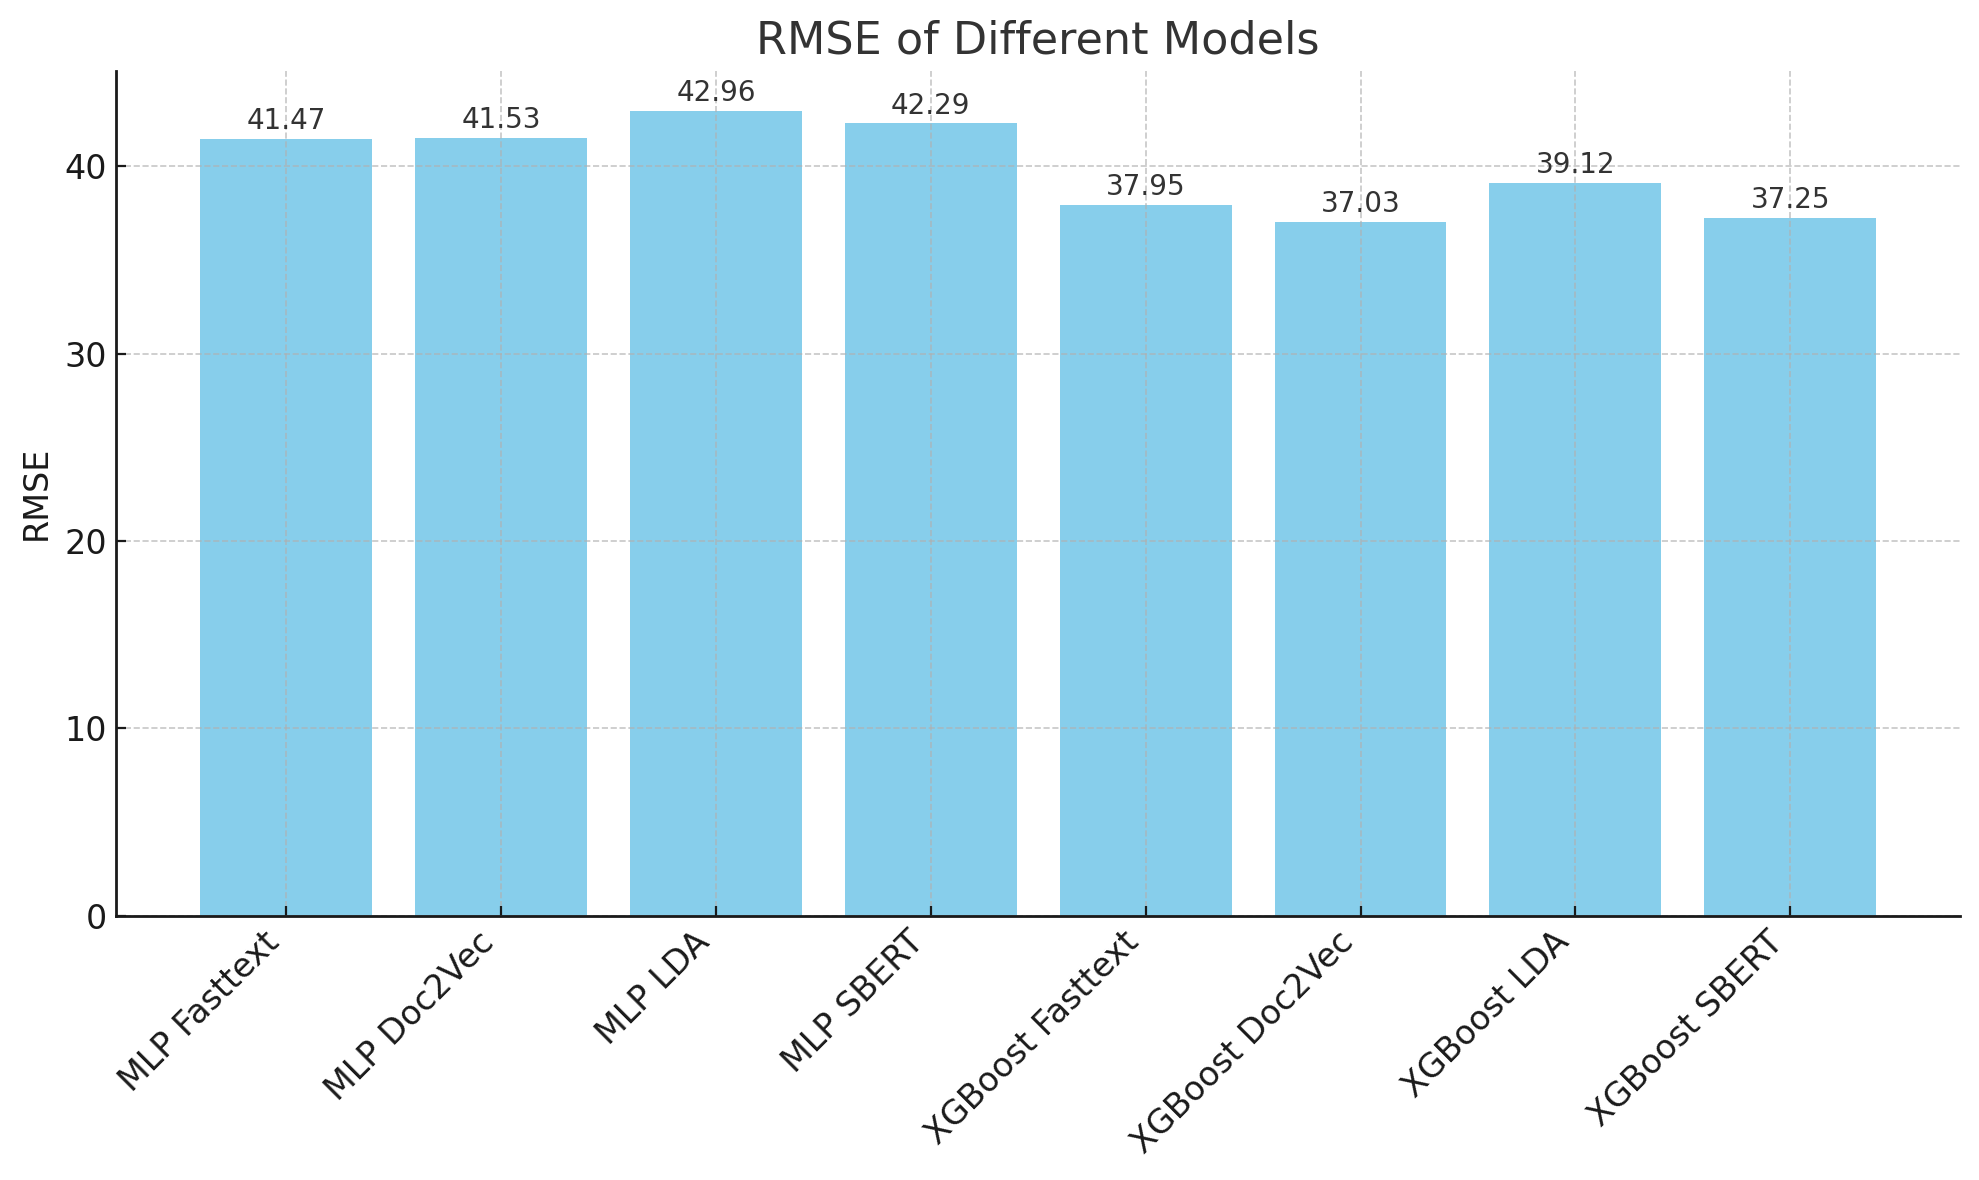
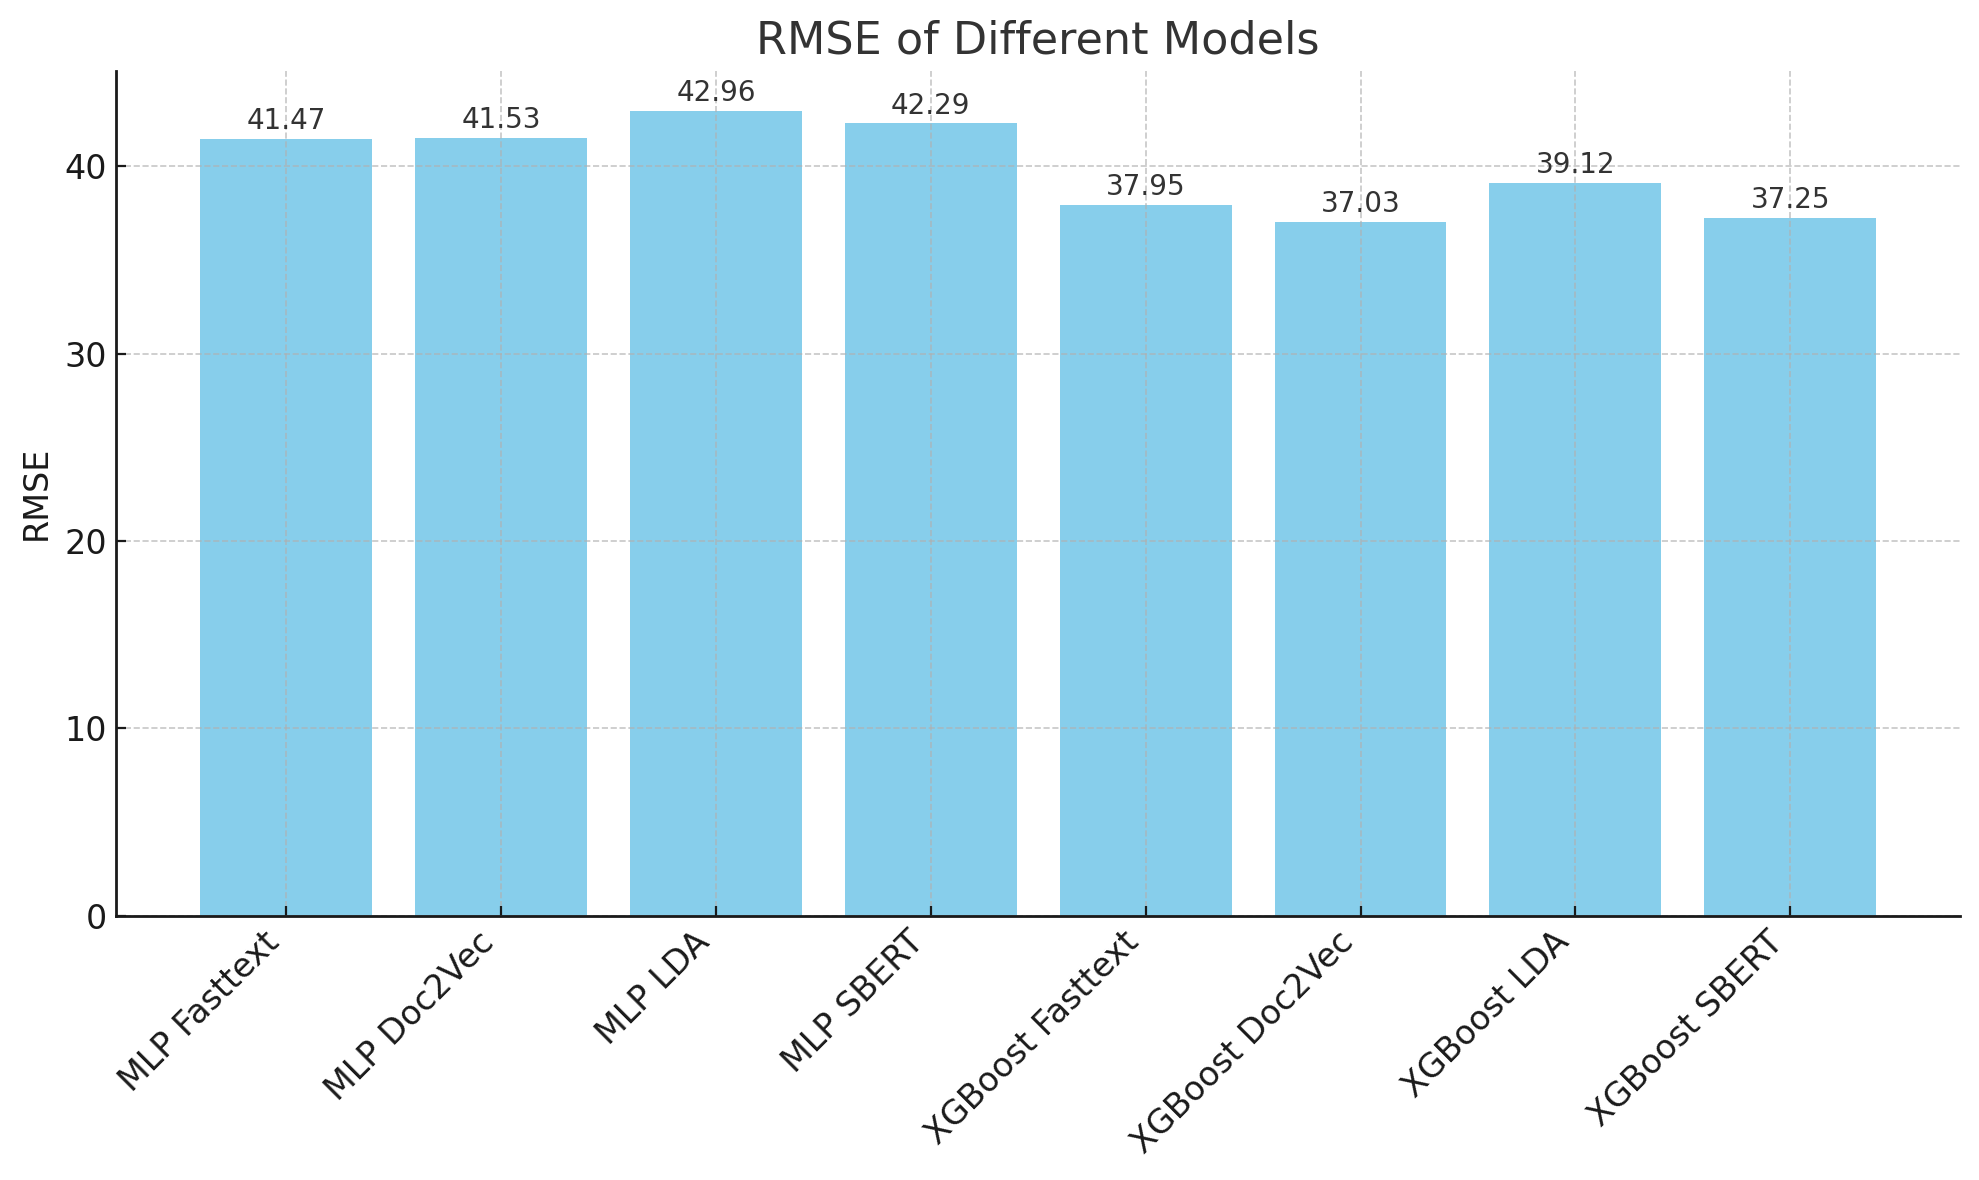
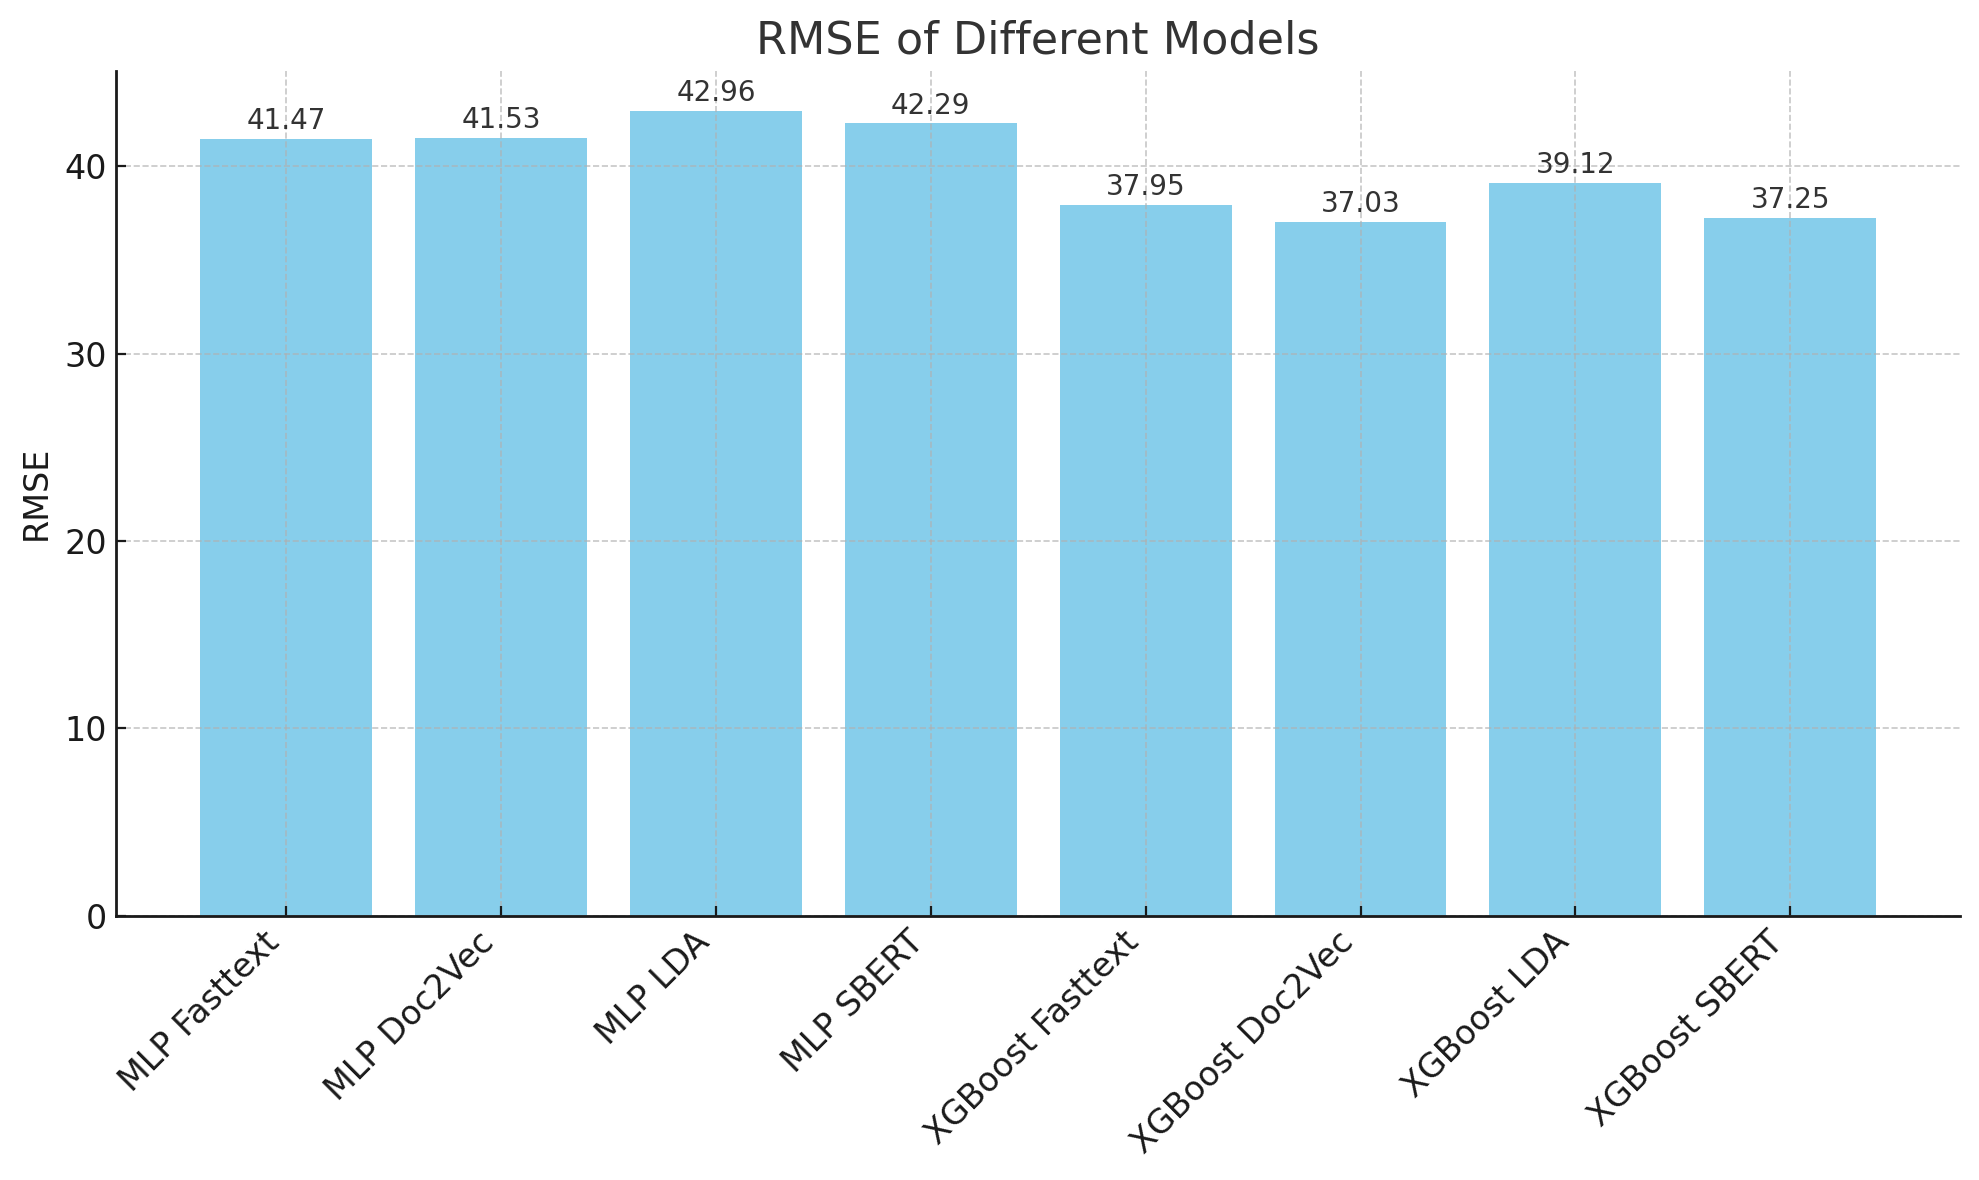
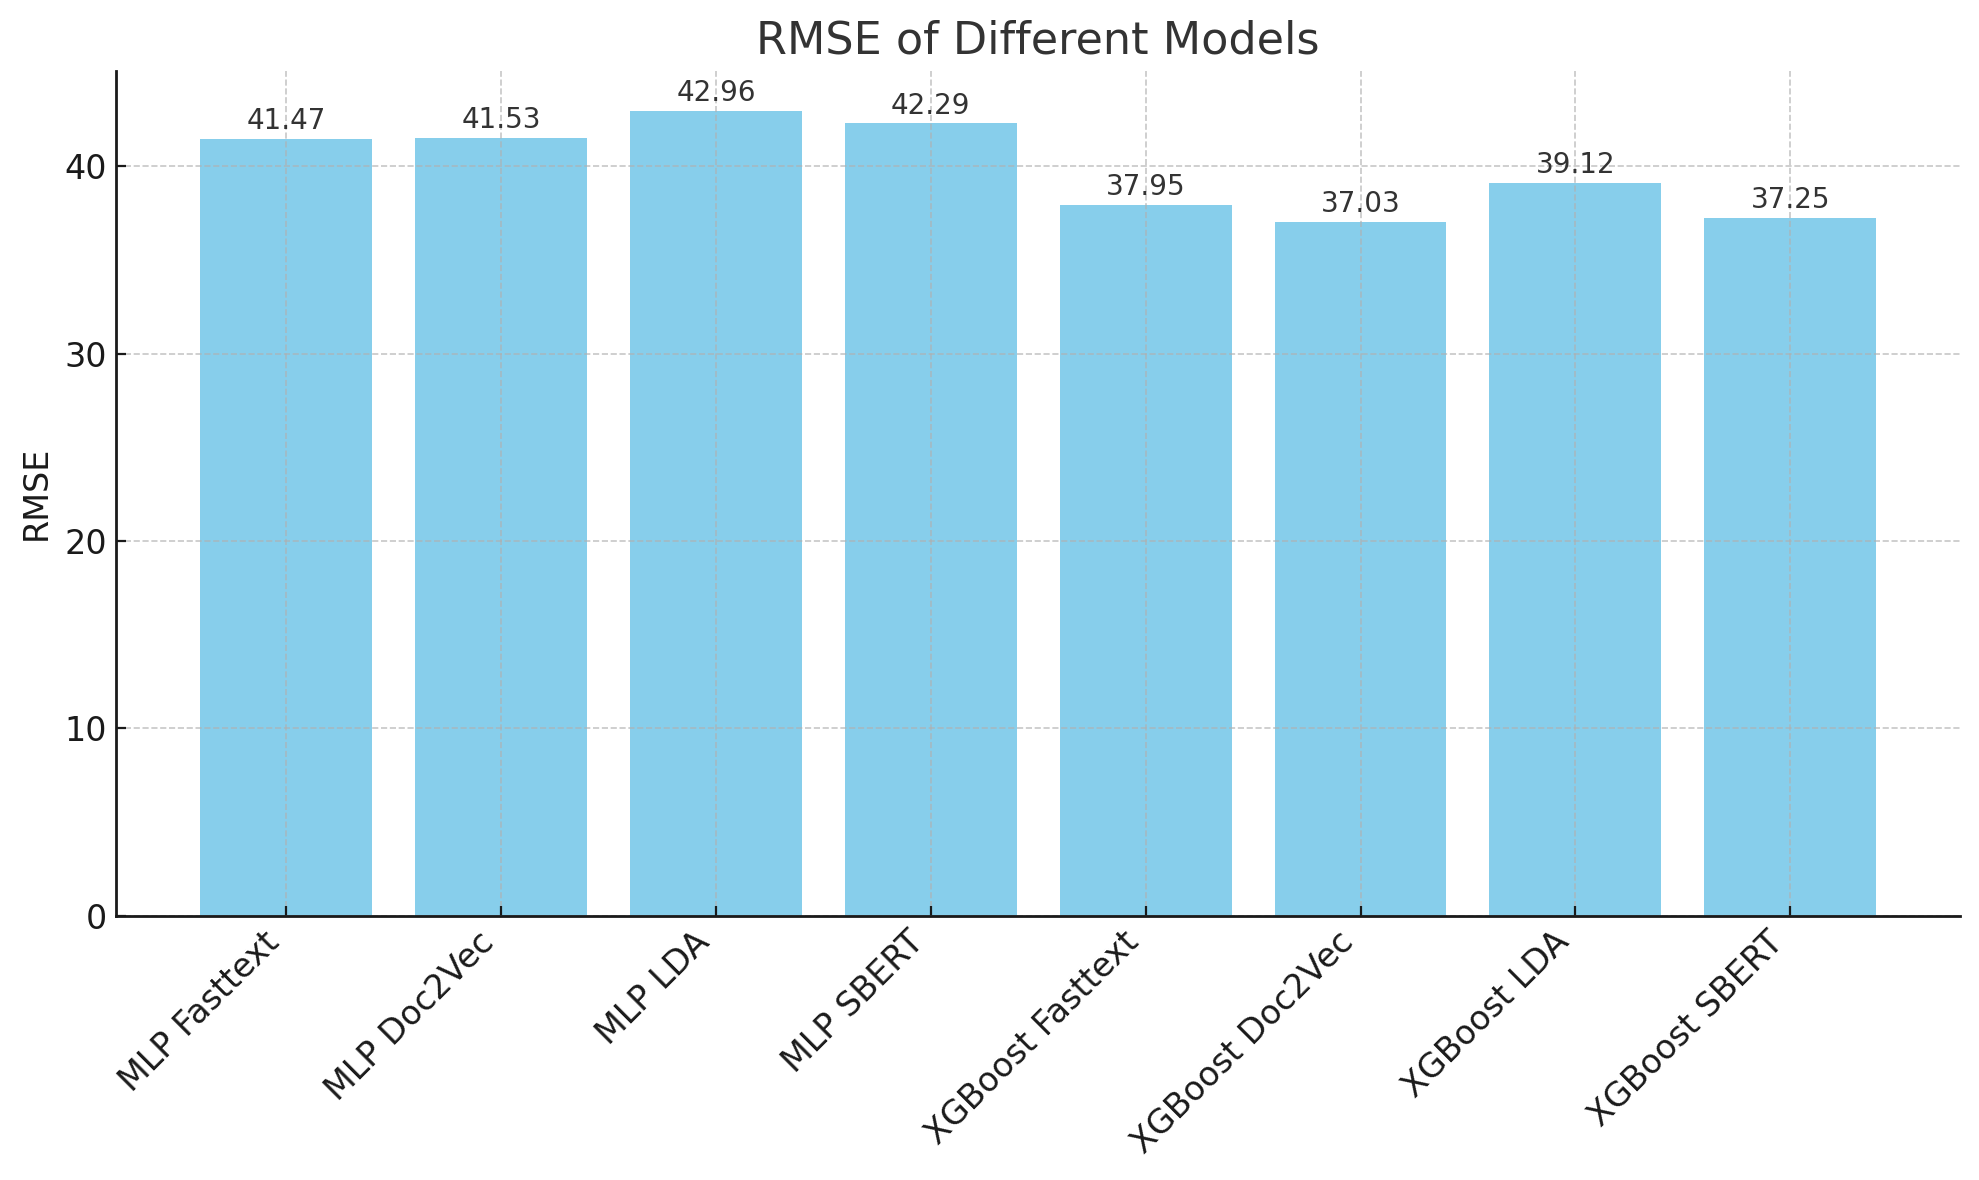